<a href="https://colab.research.google.com/github/bbucalonserra/data_analysis_and_best_practices/blob/main/Project_Woman_Violence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis and Best Practices Project

## Professors Tatiana Escovedo and Hugo Villamizar

## 1. Problem Definition

A data science project begins with a need or idea, comprising the problem definition stage. In this initial stage, one must first consider the problem to be solved. Next, the objectives should be defined, and the questions that managers or stakeholders wish to answer should be listed. **The project scope goes from the data collection from a source till the pre processing (right before the beginning of machine learning algorithms).**


### 1.1 Problem to be Solved
The incidence of violence against women in the state of Minas Gerais represents a significant social concern. The lack of detailed analysis of available data hinders the understanding of patterns, critical areas, and underlying factors of this phenomenon, thereby impeding the implementation of targeted and effective strategies to combat this issue.

### 1.2 Objectives
The main objective is to identify possible causes and critical points through the analysis of specific data, aiming to provide support for the formulation of more effective strategies and policies in the prevention and combat of this type of violence. A thorough analysis of this data is crucial to guide more targeted interventions and promote a safer and more inclusive environment for women in this region.

There are several options for the problem itself, which can be addressed:

  - Regression: used when dealing with a problem where the desired output is a continuous variable. For example, predicting prices, temperature, sales quantity, etc.
  - Classification: when the desired output is a categorical or discrete variable, such as predicting if an email is spam or not (binary classification) or identifying the type of animal in an image (multiclass classification), classification is more appropriate.
  - Supervised Learning: if the data contains pairs of input and expected output, i.e., if it has labeled data (inputs with corresponding known outputs), you are likely dealing with a supervised problem.
  - Unsupervised Learning: If you are exploring patterns in the data without the presence of labels or known outputs, it might be an unsupervised problem. Algorithms such as clustering or dimensionality reduction (like PCA) are examples of unsupervised methods.
  
Since the data pertains to incidents of violence against women, the problem may be suitable for classification tasks (binary or multiclass classification to predict, for example, if a victim will experience violence again based on characteristics such as age, gender, race, location, violence history, etc.) and unsupervised methods such as data and pattern analysis (unsupervised methods like clustering can be used to identify patterns in the data, for example, grouping victims with similar characteristics).

### 1.3 Key Questions and Insights

1. What are the most common types of violence against women in Minas Gerais?
2. Is there an age group in which the occurrence of violence against women is more frequent?
3. QWhat is the most common location for incidents of violence against women?
4. Are violent events isolated? Were there previous assaults?
4. Regarding the race of the victims, is there any predominant race?

### 1.4 Dataset Attributes

The attributes of the datasets used are:

1. **DT_NOTIFIC**: Date of the violence notification
2. **DT_NASC**: Victim's date of birth
3. **NU_IDADE_N**: Victim's age at the time of notification
4. **CS_SEXO**: Victim's gender
5. **CS_RACA**: Victim's race/ethnicity
6. **ID_MN_RESI**: Identification of the victim's municipality of residence
7. **LOCAL_OCOR**: Location of the violence occurrence
8. **OUT_VEZES**: If the violence had occurred before
9. **LES_AUTOP**: If the victim suffered bodily injuries requiring medical attention
10. **VIOL_FISIC**: If the victim suffered physical violence
11. **VIOL_PSICO**: If the victim suffered psychological violence
12. **VIOL_SEXU**: If the victim suffered sexual violence
13. **NUM_ENVOLV**: Number of individuals involved in the violence
14. **AUTOR_SEXO**: Gender of the perpetrator of the violence
15. **ORIENT_SEX**: Sexual orientation of the perpetrator of the violence
16. **IDENT_GEN**: Gender identity of the perpetrator of the violence

Note: **since the dataset is from a brazilian source, all data is in portuguese. The data will be translated to english within the next steps.**

### 1.5 Imports

As a good practice for programming in Python, all necessary libraries will be imported in a single notebook.


In [178]:
pip install unidecode

In [179]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import requests
import chardet
from mlxtend.preprocessing import TransactionEncoder
import unicodedata
import seaborn as sns
from sklearn import preprocessing
import missingno as ms

## 2 Data Collection

The second stage involves gathering the necessary information and effectively collecting the data to address the problems raised in the previous stage. This data is usually (but not necessarily) organized in one or more databases (which can be relational databases, Data Warehouses, Data Marts, or Data Lakes).


### 2.1 Source

The data was collected directly from the website of the Brazilian government, in open data format. The link for verification and consultation of the dataset can be found here: [Brazilian Government Open Data Portal](https://dados.gov.br/dados/conjuntos-dados/dados_violencia_geral_ses).


### 2.2 Dataset Structure Verification

In this stage, as five different datasets will be used (one for each year), **it will be necessary to perform some individual checks on each dataset before concatenating them to ensure that no information and quality are lost.**

In [180]:
# Informing URL to import the datasets
url_2023 = 'https://raw.githubusercontent.com/bbucalonserra/data_analysis_and_good_practices/main/dataset_woman/dados_violencia_mulheres_ses_2023.csv'
url_2022 = 'https://raw.githubusercontent.com/bbucalonserra/data_analysis_and_best_practices/main/dataset_woman/dados_violencia_mulheres_ses_2022.csv'
url_2021 = 'https://raw.githubusercontent.com/bbucalonserra/data_analysis_and_good_practices/main/dataset_woman/dados_violencia_mulheres_ses_2021.csv'
url_2020 = 'https://raw.githubusercontent.com/bbucalonserra/data_analysis_and_good_practices/main/dataset_woman/dados_violencia_mulheres_ses_2020.csv'
url_2019 = 'https://raw.githubusercontent.com/bbucalonserra/data_analysis_and_good_practices/main/dataset_woman/dados_violencia_mulheres_ses_2019.csv'

It will be evaluated for each dataset:

* Delimiter
* Existing columns
* Encoding
* Data type

These checks will be crucial to ensure that all datasets are concatenated into one without errors later on.

#### 2.2.1 Dataset 1 Verification


Firstly, it is necessary to verify the **delimiter** and **encoding** of dataset 1 (year 2023) in order to create a dataframe from it correctly.


In [181]:
# Delimiter Verification
# Here, the pd.read_csv function will be used to read the csv file. Additionally, the nrows argument will be used to read only the first 5 lines.
# The "dot something" (for example: "df.head()"") collects the result of what is on the left side of the code and passes it as the first argument of the function on the right side.
# Therefore, for better processing, head() was not used because the entire dataframe would be read and only then would the first 5 lines be selected.
pd.read_csv(url_2023, nrows = 5)

,DT_NOTIFIC,DT_NASC,NU_IDADE_N,CS_SEXO,CS_RACA,ID_MN_RESI,LOCAL_OCOR,OUT_VEZES,LES_AUTOP,VIOL_FISIC,VIOL_PSICO,VIOL_SEXU,NUM_ENVOLV,AUTOR_SEXO,ORIENT_SEX,IDENT_GEN
0,2023-01-02,2008-03-21,14,Feminino,Branca,Rio Novo,Residencia,Sim,Sim,Sim,Não,Não,Um,Feminino,Heterossexual,Ignorado
1,2023-01-01,1976-11-29,46,Feminino,Branca,Carmo do Rio Claro,Residencia,Sim,Não,Sim,Não,Não,Um,Masculino,Heterossexual,Ignorado
2,2023-01-02,1997-05-10,25,Feminino,Parda,Pirapora,Residencia,Ignorado,Sim,Sim,Não,Não,Um,Feminino,Heterossexual,Não se aplica
3,2023-01-02,1982-10-02,40,Feminino,Parda,Várzea da Palma,Residencia,Ignorado,Sim,Sim,Não,Não,Um,Feminino,Heterossexual,Não se aplica
4,2023-01-03,2016-11-10,6,Feminino,Parda,Guaraciaba,Residencia,Sim,Não,Não,Não,Sim,Um,Masculino,Não se aplica,Não se aplica


In [182]:
# Encoding Verification
response = requests.get(url_2023)
result = chardet.detect(response.content)

# Result Visualization
print(f"The archive encoding is: {result['encoding']}")

The archive encoding is: UTF-8-SIG


With the functions used in the two notebooks above, it is possible to understand that the delimiter is "," (since, by default, it has already been correctly divided into columns) and the encoding is UTF-8. Now, it is clear how to correctly read the file. Therefore, a dataframe can be created correctly.


In [183]:
df_woman_2023 = pd.read_csv(url_2023, delimiter = ',', header = 0, encoding = 'utf-8')


With the dataframe created, it is possible to verify the **existing columns**.

In [184]:
# Verification of Existing Columns
attributes = df_woman_2023.columns

# Result Visuzalization
print(f"Number of attributes: {len(attributes)}")
print("Attributes:", attributes)

Number of attributes: 16
Attributes: Index(['DT_NOTIFIC', 'DT_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_RACA',
       'ID_MN_RESI', 'LOCAL_OCOR', 'OUT_VEZES', 'LES_AUTOP', 'VIOL_FISIC',
       'VIOL_PSICO', 'VIOL_SEXU', 'NUM_ENVOLV', 'AUTOR_SEXO', 'ORIENT_SEX',
       'IDENT_GEN'],
      dtype='object')


Finally, we will check the data types of this dataframe.

In [185]:
# Check of data tipology
df_woman_2023.dtypes

DT_NOTIFIC     object
DT_NASC        object
NU_IDADE_N    float64
CS_SEXO        object
CS_RACA        object
ID_MN_RESI     object
LOCAL_OCOR     object
OUT_VEZES      object
LES_AUTOP      object
VIOL_FISIC     object
VIOL_PSICO     object
VIOL_SEXU      object
NUM_ENVOLV     object
AUTOR_SEXO     object
ORIENT_SEX     object
IDENT_GEN      object
dtype: object

#### 2.2.2 Dataset 2 Verification

Firstly, it is necessary to verify the **delimiter** and **encoding** of dataset 2 (year 2022) in order to create a dataframe from it correctly.


In [186]:
# Delimiter Verification
# Here, the pd.read_csv function will be used to read the csv file. Additionally, the nrows argument will be used to read only the first 5 lines.
# The "dot something" (for example: "df.head()"") collects the result of what is on the left side of the code and passes it as the first argument of the function on the right side.
# Therefore, for better processing, head() was not used because the entire dataframe would be read and only then would the first 5 lines be selected.
pd.read_csv(url_2022, nrows = 5)

,DT_NOTIFIC,DT_NASC,NU_IDADE_N,CS_SEXO,CS_RACA,ID_MN_RESI,LOCAL_OCOR,OUT_VEZES,LES_AUTOP,VIOL_FISIC,VIOL_PSICO,VIOL_SEXU,NUM_ENVOLV,AUTOR_SEXO,ORIENT_SEX,IDENT_GEN
0,2022-01-02,1999-01-11,22,Feminino,Branca,Campestre,Residencia,Não,Não,Sim,Não,Não,Um,Feminino,Não se aplica,Não se aplica
1,2022-01-18,1978-01-31,43,Feminino,Parda,Timóteo,Residencia,Ignorado,Não,Sim,Não,Não,Um,Masculino,Ignorado,Ignorado
2,2022-01-14,1979-02-07,42,Feminino,Parda,Ipatinga,Ignorado,Ignorado,Sim,Sim,Não,Não,Um,Feminino,Ignorado,Ignorado
3,2022-01-26,1984-10-29,37,Feminino,Branca,Catuji,Via pública,Sim,Não,Sim,Sim,Não,Um,Masculino,Heterossexual,Não se aplica
4,2022-02-04,1970-05-02,51,Feminino,Preta,Catuji,Outro,Não,Não,Sim,Não,Não,Um,Masculino,Heterossexual,Não se aplica


In [187]:
# Encoding Verification
response = requests.get(url_2022)
result = chardet.detect(response.content)

# Result Visualization
print(f"The encoding of the archieve is: {result['encoding']}")

The encoding of the archieve is: UTF-8-SIG


With the functions used in the two notebooks above, it is possible to understand that the delimiter is "," (since, by default, it has already been correctly divided into columns) and the encoding is UTF-8. Now, it is clear how to correctly read the file. Therefore, a dataframe can be created correctly.

In [188]:
df_woman_2022 = pd.read_csv(url_2022, delimiter = ',', header = 0, encoding = 'utf-8')

In [189]:
# Verification of existing columns
attributes = df_woman_2022.columns

# Visualization of Result
print(f"Number of attributes: {len(attributes)}")
print("Attributes:", attributes)

Number of attributes: 16
Attributes: Index(['DT_NOTIFIC', 'DT_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_RACA',
       'ID_MN_RESI', 'LOCAL_OCOR', 'OUT_VEZES', 'LES_AUTOP', 'VIOL_FISIC',
       'VIOL_PSICO', 'VIOL_SEXU', 'NUM_ENVOLV', 'AUTOR_SEXO', 'ORIENT_SEX',
       'IDENT_GEN'],
      dtype='object')


Finally, we will check the data types of this dataframe.

In [190]:
# Verification of data tipology
df_woman_2022.dtypes

DT_NOTIFIC    object
DT_NASC       object
NU_IDADE_N     int64
CS_SEXO       object
CS_RACA       object
ID_MN_RESI    object
LOCAL_OCOR    object
OUT_VEZES     object
LES_AUTOP     object
VIOL_FISIC    object
VIOL_PSICO    object
VIOL_SEXU     object
NUM_ENVOLV    object
AUTOR_SEXO    object
ORIENT_SEX    object
IDENT_GEN     object
dtype: object

#### 2.2.3 Dataset 3 Verification

Firstly, it is necessary to verify the **delimiter** and **encoding** of dataset 3 (year 2021) in order to create a dataframe from it correctly.


In [191]:
# Delimiter Verification
# Here, the pd.read_csv function will be used to read the csv file. Additionally, the nrows argument will be used to read only the first 5 lines.
# The "dot something" (for example: "df.head()"") collects the result of what is on the left side of the code and passes it as the first argument of the function on the right side.
# Therefore, for better processing, head() was not used because the entire dataframe would be read and only then would the first 5 lines be selected.
pd.read_csv(url_2021, nrows = 5)

,DT_NOTIFIC,DT_NASC,NU_IDADE_N,CS_SEXO,CS_RACA,ID_MN_RESI,LOCAL_OCOR,OUT_VEZES,LES_AUTOP,VIOL_FISIC,VIOL_PSICO,VIOL_SEXU,NUM_ENVOLV,AUTOR_SEXO,ORIENT_SEX,IDENT_GEN
0,2021-01-20,1998-01-21,22,Feminino,Parda,Ipatinga,Ignorado,Ignorado,Sim,Sim,Não,Não,Um,Feminino,Ignorado,Ignorado
1,2021-03-22,2000-09-17,20,Feminino,Parda,Governador Valadares,Ignorado,Ignorado,Não,Sim,Não,Não,Ignorado,Ignorado,Ignorado,Ignorado
2,2021-03-02,1976-12-15,44,Feminino,Parda,Paracatu,Residencia,Não,Sim,Não,Sim,Não,Um,Feminino,Heterossexual,Não se aplica
3,2021-02-18,2000-09-19,20,Feminino,Parda,Serro,Residencia,Sim,Não,Não,Não,Sim,Um,Masculino,Ignorado,Não se aplica
4,2021-01-28,1966-04-13,54,Feminino,Parda,Itabira,Residencia,Ignorado,Ignorado,Sim,Sim,Não,Um,Feminino,Ignorado,Não se aplica


In [192]:
# Verification of Encoding
response = requests.get(url_2021)
result = chardet.detect(response.content)

# Visualization of Result
print(f"The enconding of the achieve is: {result['encoding']}")

The enconding of the achieve is: UTF-8-SIG


With the functions used in the two notebooks above, it is possible to understand that the delimiter is "," (since, by default, it has already been correctly divided into columns) and the encoding is UTF-8. Now, it is clear how to correctly read the file. Therefore, a dataframe can be created correctly.

In [193]:
df_woman_2021 = pd.read_csv(url_2021, delimiter = ',', header = 0, encoding = 'utf-8')

With the dataframe created, it is possible to verify the **existing columns**.

In [194]:
# Verification of existing columns
attributes = df_woman_2021.columns

# Check result
print(f"Number of attributes: {len(attributes)}")
print("Attributes:", attributes)

Number of attributes: 16
Attributes: Index(['DT_NOTIFIC', 'DT_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_RACA',
       'ID_MN_RESI', 'LOCAL_OCOR', 'OUT_VEZES', 'LES_AUTOP', 'VIOL_FISIC',
       'VIOL_PSICO', 'VIOL_SEXU', 'NUM_ENVOLV', 'AUTOR_SEXO', 'ORIENT_SEX',
       'IDENT_GEN'],
      dtype='object')


Finally, we will check the data types of this dataframe.

In [195]:
# Verification of Data tipology
df_woman_2021.dtypes

DT_NOTIFIC     object
DT_NASC        object
NU_IDADE_N    float64
CS_SEXO        object
CS_RACA        object
ID_MN_RESI     object
LOCAL_OCOR     object
OUT_VEZES      object
LES_AUTOP      object
VIOL_FISIC     object
VIOL_PSICO     object
VIOL_SEXU      object
NUM_ENVOLV     object
AUTOR_SEXO     object
ORIENT_SEX     object
IDENT_GEN      object
dtype: object

#### 2.2.4 Dataset 4 Verification

Firstly, it is necessary to verify the **delimiter** and **encoding** of dataset 4 (year 2020) in order to create a dataframe from it correctly.


In [196]:
# Delimiter Verification
# Here, the pd.read_csv function will be used to read the csv file. Additionally, the nrows argument will be used to read only the first 5 lines.
# The "dot something" (for example: "df.head()"") collects the result of what is on the left side of the code and passes it as the first argument of the function on the right side.
# Therefore, for better processing, head() was not used because the entire dataframe would be read and only then would the first 5 lines be selected.
pd.read_csv(url_2020, nrows = 5)

,DT_NOTIFIC;DT_NASC;NU_IDADE_N;CS_SEXO;CS_RACA;ID_MN_RESI;LOCAL_OCOR;OUT_VEZES;LES_AUTOP;VIOL_FISIC;VIOL_PSICO;VIOL_SEXU;NUM_ENVOLV;AUTOR_SEXO;ORIENT_SEX;IDENT_GEN
0,28/02/2020;30/11/1986;33;Feminino;Parda;Belo H...
1,17/03/2020;12/01/2002;18;Feminino;Ignorado;Bel...
2,05/02/2020;18/09/1996;23;Feminino;Parda;Córreg...
3,03/03/2020;21/05/1980;39;Feminino;Parda;Lagoa ...
4,08/02/2020;04/10/1940;79;Feminino;Branca;Estiv...


In [197]:
# Encoding verification
response = requests.get(url_2020)
result = chardet.detect(response.content)

# Visualization of result
print(f"The encoding of the archieve is: {result['encoding']}")

The encoding of the archieve is: UTF-8-SIG


With the functions used in the two notebooks above, it is possible to understand that: the delimiter is ";" (since Python did not automatically split the columns and there is "," between each column) and the encoding is UTF-8. Now, it is clear how to correctly read the file. Therefore, a dataframe can be created correctly.


In [198]:
df_woman_2020 = pd.read_csv(url_2020, delimiter = ';', header = 0, encoding = 'utf-8')


With the dataframe created, it is possible to verify the **existing columns**.

In [199]:
# Verification of existing columns
attributes = df_woman_2020.columns

# Visualization of result
print(f"Number of attributes: {len(attributes)}")
print("Attributes:", attributes)

Number of attributes: 16
Attributes: Index(['DT_NOTIFIC', 'DT_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_RACA',
       'ID_MN_RESI', 'LOCAL_OCOR', 'OUT_VEZES', 'LES_AUTOP', 'VIOL_FISIC',
       'VIOL_PSICO', 'VIOL_SEXU', 'NUM_ENVOLV', 'AUTOR_SEXO', 'ORIENT_SEX',
       'IDENT_GEN'],
      dtype='object')


Finally, we will check the data types of this dataframe.

In [200]:
# Verification of data tipology
df_woman_2020.dtypes

DT_NOTIFIC    object
DT_NASC       object
NU_IDADE_N     int64
CS_SEXO       object
CS_RACA       object
ID_MN_RESI    object
LOCAL_OCOR    object
OUT_VEZES     object
LES_AUTOP     object
VIOL_FISIC    object
VIOL_PSICO    object
VIOL_SEXU     object
NUM_ENVOLV    object
AUTOR_SEXO    object
ORIENT_SEX    object
IDENT_GEN     object
dtype: object

#### 2.2.5 Dataset 5 Verification

Firstly, it is necessary to verify the **delimiter** and **encoding** of dataset 5 (year 2019) in order to create a dataframe from it correctly.


In [201]:
# Delimiter Verification
# Here, the pd.read_csv function will be used to read the csv file. Additionally, the nrows argument will be used to read only the first 5 lines.
# The "dot something" (for example: "df.head()"") collects the result of what is on the left side of the code and passes it as the first argument of the function on the right side.
# Therefore, for better processing, head() was not used because the entire dataframe would be read and only then would the first 5 lines be selected.
pd.read_csv(url_2019, nrows = 5)

,DT_NOTIFIC;DT_NASC;NU_IDADE_N;CS_SEXO;CS_RACA;ID_MN_RESI;LOCAL_OCOR;OUT_VEZES;LES_AUTOP;VIOL_FISIC;VIOL_PSICO;VIOL_SEXU;NUM_ENVOLV;AUTOR_SEXO;ORIENT_SEX;IDENT_GEN
0,16/04/2019;31/01/1998;21;Feminino;Parda;Ipatin...
1,16/04/2019;19/10/1974;44;Feminino;Amarela;Sant...
2,16/04/2019;08/07/1988;30;Feminino;Branca;Carat...
3,12/03/2019;19/09/1975;43;Feminino;Amarela;Ubap...
4,12/04/2019;25/07/1989;29;Feminino;Parda;Ubapor...


In [202]:
# Encoding verification
response = requests.get(url_2019)
result = chardet.detect(response.content)

# Visualization of result
print(f"The encoding of the archieve is: {result['encoding']}")

The encoding of the archieve is: UTF-8-SIG


With the functions used in the two notebooks above, it is possible to understand that: the delimiter is ";" (since Python did not automatically split the columns and there is "," between each column) and the encoding is UTF-8. Now, it is clear how to correctly read the file. Therefore, a dataframe can be created correctly.


In [203]:
df_woman_2019 = pd.read_csv(url_2019, delimiter = ';', header = 0, encoding = 'utf-8')


With the dataframe created, it is possible to verify the **existing columns**.

In [204]:
# Verification of existing columns
attributes = df_woman_2019.columns

# Check result
print(f"Number of attributes: {len(attributes)}")
print("Attributes:", attributes)

Number of attributes: 16
Attributes: Index(['DT_NOTIFIC', 'DT_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_RACA',
       'ID_MN_RESI', 'LOCAL_OCOR', 'OUT_VEZES', 'LES_AUTOP', 'VIOL_FISIC',
       'VIOL_PSICO', 'VIOL_SEXU', 'NUM_ENVOLV', 'AUTOR_SEXO', 'ORIENT_SEX',
       'IDENT_GEN'],
      dtype='object')


Finally, we will check the data types of this dataframe.

In [205]:
# Verification of data tipology
df_woman_2019.dtypes

DT_NOTIFIC     object
DT_NASC        object
NU_IDADE_N    float64
CS_SEXO        object
CS_RACA        object
ID_MN_RESI     object
LOCAL_OCOR     object
OUT_VEZES      object
LES_AUTOP      object
VIOL_FISIC     object
VIOL_PSICO     object
VIOL_SEXU      object
NUM_ENVOLV     object
AUTOR_SEXO     object
ORIENT_SEX     object
IDENT_GEN      object
dtype: object

#### 2.2.6 Dataframes Concatenation

With the previous checks and dataframes read and created correctly, it was noticed that they have identical:

* Columns
* Encoding
* Data Types

Therefore, it is possible to concatenate the 5 dataframes into just one.

In [206]:
# Concatenation of dataframes
df_woman = pd.concat([df_woman_2023, df_woman_2022, df_woman_2021, df_woman_2020, df_woman_2019], axis = 0)

In [207]:
# Check for the last 10 rows
df_woman.tail(10)

,DT_NOTIFIC,DT_NASC,NU_IDADE_N,CS_SEXO,CS_RACA,ID_MN_RESI,LOCAL_OCOR,OUT_VEZES,LES_AUTOP,VIOL_FISIC,VIOL_PSICO,VIOL_SEXU,NUM_ENVOLV,AUTOR_SEXO,ORIENT_SEX,IDENT_GEN
38766,12/11/2019,13/08/1983,36.0,Feminino,Parda,Ipatinga,Ignorado,Não,Não,Sim,Não,Não,Ignorado,Ignorado,Ignorado,Ignorado
38767,11/10/2019,18/09/1987,32.0,Feminino,Branca,Timóteo,Residencia,Sim,Não,Sim,Sim,Não,Dois ou mais,Masculino,Heterossexual,Ignorado
38768,13/08/2019,09/05/1979,40.0,Feminino,Parda,Ipatinga,Ignorado,Não,Sim,Não,Não,Não,Um,Feminino,Ignorado,Ignorado
38769,01/07/2019,19/02/1996,23.0,Feminino,Branca,Ipatinga,Ignorado,Não,Não,Sim,Não,Não,Um,Ignorado,Ignorado,Ignorado
38770,07/01/2019,09/05/1979,39.0,Feminino,Preta,Ipatinga,Residencia,Não,Sim,Não,Não,Não,Um,Feminino,Heterossexual,Não se aplica
38771,08/03/2019,02/08/1983,35.0,Feminino,Parda,Porteirinha,Comercio/Serviços,Não,Não,Não,Não,Sim,Um,Masculino,Heterossexual,Não se aplica
38772,21/05/2019,31/05/2002,16.0,Feminino,Parda,Porteirinha,Residencia,Sim,Não,Sim,Sim,Sim,Um,Masculino,Heterossexual,Não se aplica
38773,20/05/2019,31/03/2007,12.0,Feminino,Branca,Cláudio,Residencia,Não,Não,Não,Não,Sim,Um,Masculino,Heterossexual,Não se aplica
38774,19/09/2019,29/01/1986,32.0,Feminino,Ignorado,Nova Lima,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado
38775,01/03/2019,06/11/2000,18.0,Feminino,Branca,Alfenas,Residencia,Ignorado,Sim,Sim,Não,Não,Um,Masculino,Heterossexual,Não se aplica


With this, it is noted that the final dataset was correctly concatenated.

#### 2.2.7 Transformation to English
Now, as it is a dataset of Brazilian data, they are all in Portuguese. Let's now translate it into English.

#### 2.2.7.1 Change of Column Names

In [208]:
# Creating new names for the columns in english
english_columns = ['NOTIFICATION_DATE', 'DATE_OF_BIRTH', 'AGE_NUMBER', 'SEX_CODE', 'RACE_CODE',
           'RESIDENCE_CITY_ID', 'OCCURRENCE_LOCATION', 'OTHER_TIMES', 'SELF_HARM',
           'PHYSICAL_VIOLENCE', 'PSYCHOLOGICAL_VIOLENCE', 'SEXUAL_VIOLENCE',
           'NUMBER_OF_INVOLVED', 'PERPETRATOR_SEX', 'SEXUAL_ORIENTATION', 'GENDER_IDENTITY']

# Replacing the column names
df_woman.columns = english_columns

#### 2.2.7.2 Change of Categorical Columns to English


In [209]:
# Collecting all categories
all_categories = (
    df_woman['SEX_CODE'].unique().tolist() +
    df_woman['RACE_CODE'].unique().tolist() +
    df_woman['OCCURRENCE_LOCATION'].unique().tolist() +
    df_woman['OTHER_TIMES'].unique().tolist() +
    df_woman['SELF_HARM'].unique().tolist() +
    df_woman['PHYSICAL_VIOLENCE'].unique().tolist() +
    df_woman['PSYCHOLOGICAL_VIOLENCE'].unique().tolist() +
    df_woman['SEXUAL_VIOLENCE'].unique().tolist() +
    df_woman['NUMBER_OF_INVOLVED'].unique().tolist() +
    df_woman['PERPETRATOR_SEX'].unique().tolist() +
    df_woman['SEXUAL_ORIENTATION'].unique().tolist() +
    df_woman['GENDER_IDENTITY'].unique().tolist()
)

In [210]:
# Create a dictionary to map Portuguese values to English values
portuguese_to_english = {
              'Feminino': 'Female',
              'Branca': 'White',
              'Parda': 'Mixed-race',
              'Preta': 'Black',
              'Ignorado': 'Unknown',
              'Amarela': 'Asian',
              'nan': 'NaN',
              'Indígena': 'Indigenous',
              'Residencia': 'Residence',
              'Via pública': 'Public road',
              'Comercio/Serviços': 'Commerce/Services',
              'Outro': 'Other',
              'Bar ou similar': 'Bar or similar',
              'Escola': 'School',
              'Habitação coletiva': 'Collective housing',
              'Local de pratica esportiva': 'Sports practice location',
              'Industria/Construção': 'Industry/Construction',
              'Sim': 'Yes',
              'Não': 'No',
              'Um': 'One',
              'Dois ou mais': 'Two or more',
              'Masculino': 'Male',
              'Ambos os sexos': 'Both sexes',
              'Heterossexual': 'Heterosexual',
              'Não se aplica': 'Not applicable',
              'Homossexual': 'Homosexual',
              'Bissexual': 'Bisexual',
              'Transsexual Mulher': 'Transsexual woman',
              'Transsexual Homem': 'Transsexual man',
              'Travesti': 'Travesti'}

# Map the Portuguese values to English values in the specified columns
for column in ['SEX_CODE', 'RACE_CODE', 'OTHER_TIMES', 'SELF_HARM', 'PHYSICAL_VIOLENCE', 'PSYCHOLOGICAL_VIOLENCE', 'SEXUAL_VIOLENCE', 'PERPETRATOR_SEX', 'SEXUAL_ORIENTATION', 'GENDER_IDENTITY', 'OCCURRENCE_LOCATION', 'NUMBER_OF_INVOLVED']:
    df_woman[column] = df_woman[column].map(portuguese_to_english)

## 3 Data Analysis
From this point on, ETL operations (Extraction, Transformation, Loading) can be performed on the source data in order to prepare it for the models that will be built in the future. In this stage, it is necessary to understand what information is available in the dataset.

### 3.1 Data Structure Analysis
In this stage, the verification of the dataset's dimensions, variable types, and identification of missing values will be performed.

In [211]:
# To check attributes (columns)
df_woman.columns

Index(['NOTIFICATION_DATE', 'DATE_OF_BIRTH', 'AGE_NUMBER', 'SEX_CODE',
       'RACE_CODE', 'RESIDENCE_CITY_ID', 'OCCURRENCE_LOCATION', 'OTHER_TIMES',
       'SELF_HARM', 'PHYSICAL_VIOLENCE', 'PSYCHOLOGICAL_VIOLENCE',
       'SEXUAL_VIOLENCE', 'NUMBER_OF_INVOLVED', 'PERPETRATOR_SEX',
       'SEXUAL_ORIENTATION', 'GENDER_IDENTITY'],
      dtype='object')

In [212]:
# To check number of instances (rows)
num_instancias = df_woman.shape[0]

# Check result
print(f"Number of instances: {num_instancias}")

Number of instances: 162803


In [213]:
# To view the dimensions of the dataset. The first value represents the number of rows and the second represents the number of columns.
dimensoes = df_woman.shape

# Check result
print(f"Dimensões do dataset: {dimensoes}")

Dimensões do dataset: (162803, 16)


In [214]:
# To view the data type of each attribute in the dataset.
df_woman.dtypes

NOTIFICATION_DATE          object
DATE_OF_BIRTH              object
AGE_NUMBER                float64
SEX_CODE                   object
RACE_CODE                  object
RESIDENCE_CITY_ID          object
OCCURRENCE_LOCATION        object
OTHER_TIMES                object
SELF_HARM                  object
PHYSICAL_VIOLENCE          object
PSYCHOLOGICAL_VIOLENCE     object
SEXUAL_VIOLENCE            object
NUMBER_OF_INVOLVED         object
PERPETRATOR_SEX            object
SEXUAL_ORIENTATION         object
GENDER_IDENTITY            object
dtype: object

In [215]:
# To view the count of non-null values per column.
df_woman.count()

NOTIFICATION_DATE         162803
DATE_OF_BIRTH             161402
AGE_NUMBER                162798
SEX_CODE                  162803
RACE_CODE                 162384
RESIDENCE_CITY_ID         162384
OCCURRENCE_LOCATION       158197
OTHER_TIMES               156728
SELF_HARM                 157251
PHYSICAL_VIOLENCE         158245
PSYCHOLOGICAL_VIOLENCE    158206
SEXUAL_VIOLENCE           158197
NUMBER_OF_INVOLVED        155626
PERPETRATOR_SEX           157815
SEXUAL_ORIENTATION        158268
GENDER_IDENTITY           158268
dtype: int64

In [216]:
# Check Nan Values
nan_values = df_woman[df_woman.isna().any(axis=1)]

# Check result
print("NaN Values:")
print(nan_values)

NaN Values:
      NOTIFICATION_DATE DATE_OF_BIRTH  AGE_NUMBER SEX_CODE   RACE_CODE  \
12           2023-01-01    2005-05-06        17.0   Female       White   
101          2023-01-06    1965-12-10        57.0   Female       Black   
105          2023-01-09    1983-06-19        39.0   Female       White   
110          2023-01-07    2009-08-15        13.0   Female  Mixed-race   
112          2023-01-03    1972-07-15        50.0   Female  Mixed-race   
...                 ...           ...         ...      ...         ...   
38651        07/04/2019    27/05/1989        29.0   Female  Mixed-race   
38730        04/05/2019    01/02/2005        14.0   Female     Unknown   
38747        14/01/2019    07/04/1978        40.0   Female     Unknown   
38755        18/11/2019    09/12/1977        41.0   Female     Unknown   
38759        12/02/2019    02/09/2005        13.0   Female       White   

          RESIDENCE_CITY_ID OCCURRENCE_LOCATION OTHER_TIMES SELF_HARM  \
12     Senhora dos Remédio

In [217]:
# Generate a statistical summary of the dataset (mean, standard deviation, minimum, maximum, and quartiles). Here, since the only column that contains numerical values is the age column, it will be the only one returning results with this command.
df_woman.describe()

,AGE_NUMBER
count,162798.000000
mean,30.064792
std,15.908174
min,0.000000
25%,18.000000
50%,28.000000
75%,40.000000
max,121.000000


In [218]:
# Check if there are only "Female" entries in the RACE_CODE column, as theoretically, there should only be data for individuals of the female sex.
df_woman['SEX_CODE'].value_counts()

Female    162803
Name: SEX_CODE, dtype: int64

### 3.2 Descriptive Statistics

Descriptive statistics is the branch of statistics that deals with organizing and describing data, which can be expressed in tables and graphs. Some questions that can be answered in this stage are:

1. How many attributes¹ and instances² are there?
2. What are the dimensions of the dataset?
3. What columns are available?
4. How many rows per column are there in the dataset?
5. What are the data types of the attributes?
6. Check the first few rows of the dataset. Is there anything noteworthy?
7. Are there missing, outlier, or inconsistent values?
8. Provide a statistical summary of attributes with numerical values (minimum, maximum, median, mode, mean, standard deviation, and number of missing values). What do you observe?

Attributes¹ = different measurements or characteristics that describe each instance in the dataset, also known as rows

Instances² = individual records in the dataset, also known as rows


**NOTE: Some checks will be performed again for academic bias, although they were already done before dataset concatenation.**

#### 3.3.1 Quantitative Variables

Quantitative variables are those that represent numerical quantities, i.e., numerical values that can be measured or counted. They are expressed in numbers and can undergo mathematical operations. They are divided into:

* Discrete - when they are finite and enumerable, typically integers, such as number of children, number of cars, or number of cigarettes smoked per day
* Continuous - when the possible results belong to a range of real numbers and measurement results, typically numbers with decimals, such as weight, height, and salary

**In this analysis, there is only one discrete quantitative variable: age.** Therefore, univariate unimodal analyses will be performed. They refer to graphical or visual representations of data that display a single mode or prominent peak in their distribution. In statistics, a mode is the value that occurs most frequently in a dataset. Therefore, a unimodal visualization typically shows a single maximum point of data concentration. In this case, in addition to unimodal, as there is only one discrete quantitative variable, it is called univariate, and visualizations will be used to assess the shape of the distribution and identify where peaks are located. The most common graphs for unimodal quantitative variables are:

* Histogram
* Density plot
* Boxplot
* Scatter plot
* Line plot (if the variable changes over time)



##### 3.3.1.1 Age Variable - Histogram

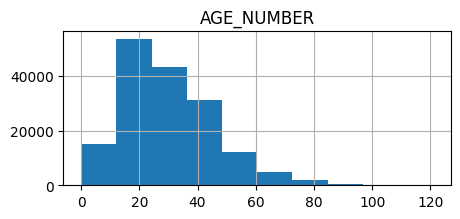

In [219]:
# Histogram
df_woman.hist(figsize = (5,2))
plt.show()

It is noted that there is a predominance of events in women in the age range of 20 years old.

##### 3.3.1.2 Age Variable - Density Plot

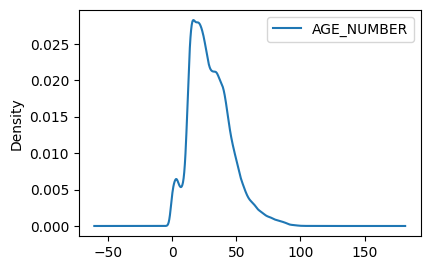

In [220]:
# Density plot
df_woman.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))

plt.show()

The density plot did not prove to be a good alternative, as it is not possible to visualize the age range, only that the peak occurs between 0 and 50.


##### 3.3.1.3 Age Variable - Boxplot

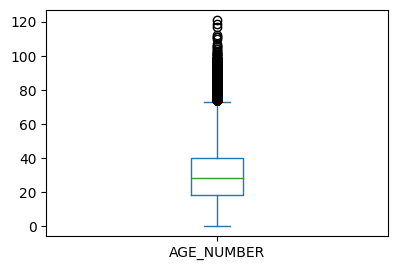

In [221]:
# Boxplot
df_woman.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

The boxplot showed that there are some values outside the range (above 100, for example), indicating the **presence of possible outliers**.

#### 3.2.2 Qualitative Variables

Qualitative (or categorical) variables refer to data types that represent non-numeric characteristics or qualities. They describe qualities or attributes and are often expressed in words or categories, not numerical values. They are divided into:

* Nominal - Represent categories **without a specific order or hierarchy**.
Examples: colors (red, blue, green), gender (male, female), marital status (single, married, divorced)

* Ordinal - Have categories that **have a specific order or hierarchy**.
Examples: levels of agreement (strongly disagree, disagree, neutral, agree, strongly agree), levels of education (elementary school, high school, undergraduate, postgraduate)

The main types of graphs used in qualitative variables are:

* Pie Chart
* Bar Chart / Column Chart

Since the analysis of violence against women in the state of Minas Gerais has only 1 quantitative variable and all others are qualitative, algorithms and methods focused on this type of variable can be used.


##### 3.2.2.1 Frequency Distribution
In this stage, the verification of categorical variables present in the dataset will be executed, allowing understanding the distribution of different categories in each of these variables. From these counts, it is possible to advance to more detailed analyses of the relationships between these categorical variables.

**For categorical values with few categories, a pie chart was used, for categorical values with many categories, a bar chart was used.**


###### 3.2.2.1.1 Race Distribution

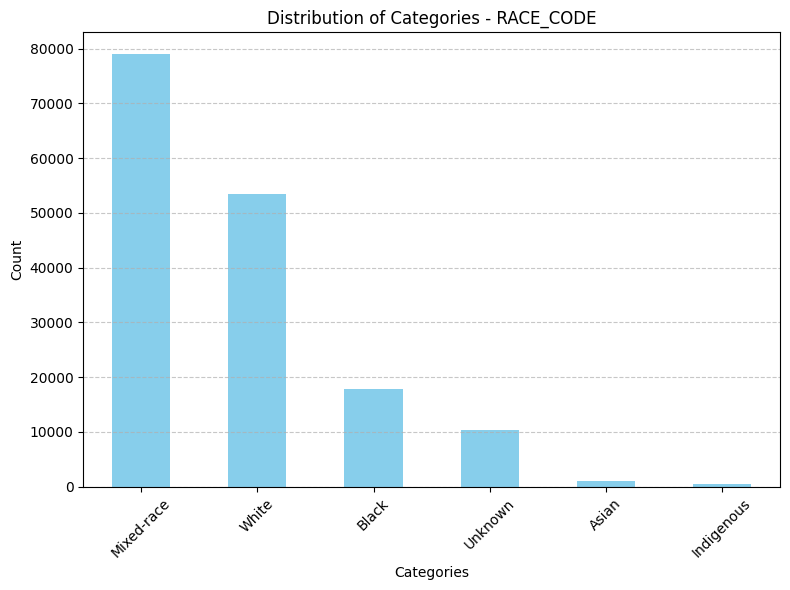

In [222]:
# Counting each categorical variable
count_race = df_woman['RACE_CODE'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
count_race.plot(kind='bar', color='skyblue')
plt.title('Distribution of Categories - RACE_CODE')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The first insight that can be drawn is that brown women suffer much more aggression than women of other races. According to the above generated graph, the following breakdown of aggressions is noted:

* Mixed-race: 47.16%
* White: 32.02%
* Black: 10.56%
* Unknown: 6.06%
* Yellow: 0.68%
* Indigenous: 0.33%

According to IBGE (Brazilian Institute of Geography and Statistics), in the year 2022, about 45.5% of the Brazilian population is brown and, also considering that 51.48% of the Brazilian population is brown, it leads to a conclusion that there are 23.41% brown women. Also according to IBGE,


###### 3.2.2.1.2 Occurence Distribution

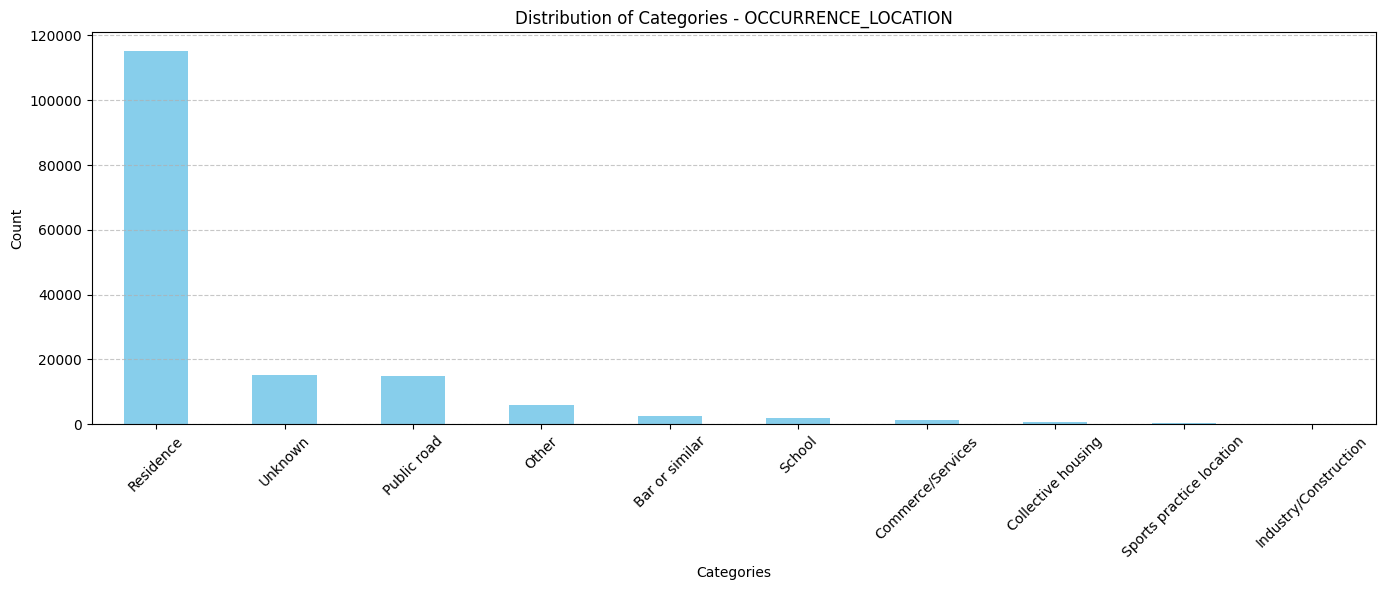

In [223]:
# Occurence Distribution
count_occurence_location = df_woman['OCCURRENCE_LOCATION'].value_counts()

# Plot into a bar chart
plt.figure(figsize=(14, 6))
count_occurence_location.plot(kind='bar', color='skyblue')
plt.title('Distribution of Categories - OCCURRENCE_LOCATION')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In relation to the distribution of the occurrence location, the following distribution is noted:

* Residence: 71.52%
* Unknown: 9.39%
* Public road: 9.20%
* Other: 3.76%
* Bar or similar: 1.64%
* School: 1.12%
* Commerce/Services: 0.86%
* Collective housing: 0.48%
* Sports practice location: 0.17%
* Industry/Construction: 0.08%

**Inside the house is the location where most violence against women occurs**, thus within their own family. Making it even more difficult to find solutions to support these individuals.


###### 3.2.2.1.3 Distribution if There Was Aggresion Other Times

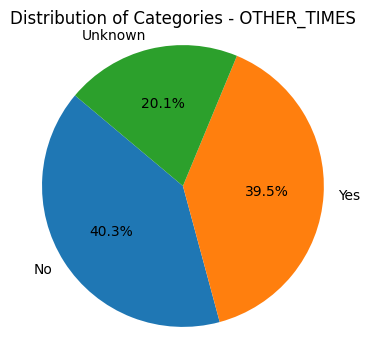

In [224]:
# Distribution if there was aggresion other times
count_other_times = df_woman['OTHER_TIMES'].value_counts()

# Plot into a pie chart
plt.figure(figsize=(4, 4))
plt.pie(count_other_times, labels=count_other_times.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories - OTHER_TIMES')
plt.axis('equal')
plt.show()

According to the above analysis, when comparing if there were other aggressions, almost 40% of the population of women who suffered aggression claim to have been violated. This **may** indicate that the majority of **women who are assaulted remain in the place or relationship where they suffer aggression for a longer period and do not seek help or distance themselves immediately after the first incident.**

###### 3.2.2.1.4 Distribution of Events with Bodily Injuries

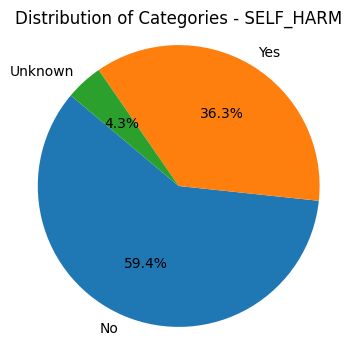

In [225]:
# Distribution if there was bodily injuries
count_self_harm = df_woman['SELF_HARM'].value_counts()

# Plot into a pie chart
plt.figure(figsize=(4, 4))
plt.pie(count_self_harm, labels=count_self_harm.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories - SELF_HARM')
plt.axis('equal')
plt.show()

According to the above analysis, as most of the assault events did not require medical attention due to bodily injuries, it may indicate that physical assault is not the most common type of aggression. **Further analysis regarding the typology of the aggression is warranted.**

###### 3.2.2.1.5 Distribution of Whether There Was Physical Violence

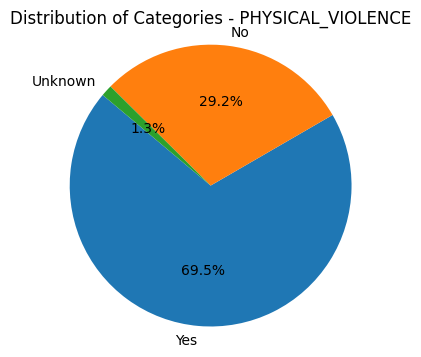

In [226]:
# Distribution of Whether There Was Physical Violence
count_physical_violence = df_woman['PHYSICAL_VIOLENCE'].value_counts()

# Plot into pie chart
plt.figure(figsize=(4, 4))
plt.pie(count_physical_violence, labels=count_physical_violence.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories - PHYSICAL_VIOLENCE')
plt.axis('equal')
plt.show()


The above graph represents that the **majority of violence events against women involve physical violence**, nearly 70%.

###### 3.2.2.1.6 Distribution of Whether There Was Psychological Violence

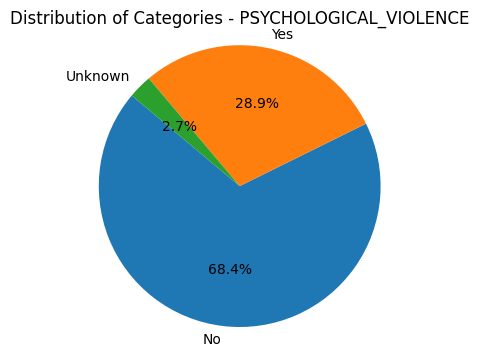

In [227]:
# Distribution of whether there was psychological violence
count_psy_violence = df_woman['PSYCHOLOGICAL_VIOLENCE'].value_counts()

# Plot into pie chart
plt.figure(figsize=(4, 4))
plt.pie(count_psy_violence, labels=count_psy_violence.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories - PSYCHOLOGICAL_VIOLENCE')
plt.axis('equal')
plt.show()

The above graph represents that the **majority of violence events against women do not involve psychological violence**, almost reaching 70%.

###### 3.2.2.1.7 Distribution of Whether There Was Sexual Violence

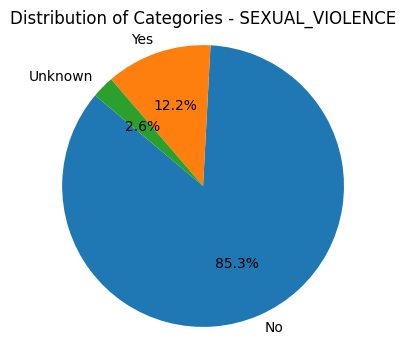

In [228]:
# Distribution of Whether There Was Sexual Violence
count_sexual_violence = df_woman['SEXUAL_VIOLENCE'].value_counts()

# Plot into pie chart
plt.figure(figsize=(4, 4))
plt.pie(count_sexual_violence, labels=count_sexual_violence.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories - SEXUAL_VIOLENCE')
plt.axis('equal')
plt.show()

The graph above represents that the **majority of violence events against women do not involve sexual violence.**

###### 3.2.2.1.8 Distribution of Number of Involved Individuals

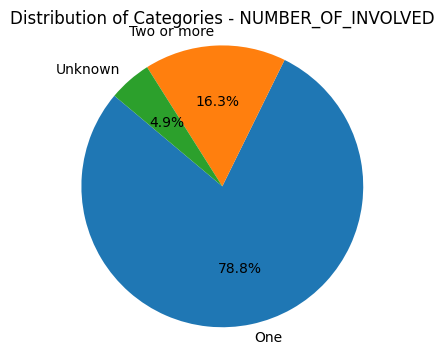

In [229]:
# Distribution of Number of Involved Individuals
count_number_of_involved = df_woman['NUMBER_OF_INVOLVED'].value_counts()

# Plot into pie chart
plt.figure(figsize=(4, 4))
plt.pie(count_number_of_involved, labels=count_number_of_involved.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories - NUMBER_OF_INVOLVED')
plt.axis('equal')
plt.show()

The above graph represents that the **majority of violence events against women involve "only" one aggressor, nearing 80%.**

###### 3.2.2.1.9 Distribution of Perpetrator Sex

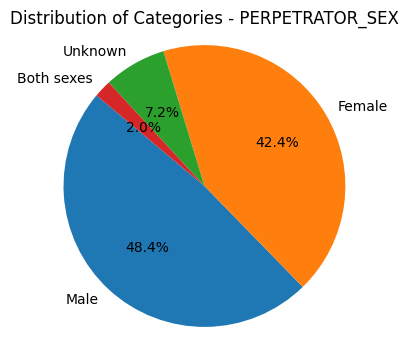

In [230]:
# Distribution of perpetrator sex
count_perpetrator_sex = df_woman['PERPETRATOR_SEX'].value_counts()

# Plot into pie chart
plt.figure(figsize=(4, 4))
plt.pie(count_perpetrator_sex, labels=count_perpetrator_sex.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories - PERPETRATOR_SEX')
plt.axis('equal')
plt.show()

In the above analysis, it is possible to find a different insight. There is a high number of female aggressors as well. Therefore, **it is interesting to delve deeper into the sexual orientation of female perpetrators to understand if the aggression comes from family members (such as mothers or sisters) or from partners.**

###### 3.2.2.1.10 Distribution of the Sexual Orientation of the Perpetrator

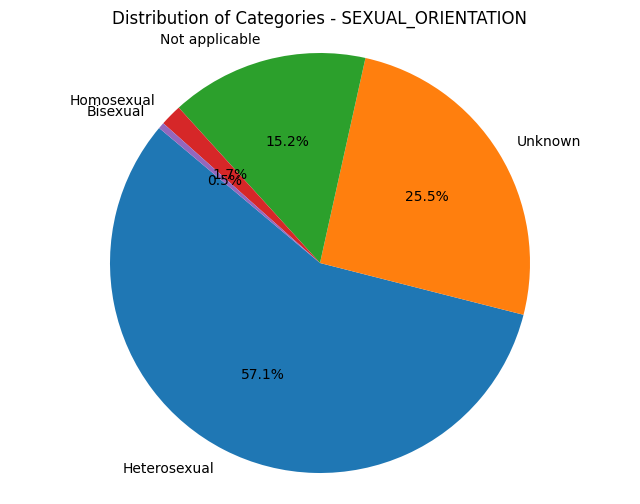

In [231]:
# Distribution of sexual orientation
count_sexual_orientation = df_woman['SEXUAL_ORIENTATION'].value_counts()

# Plot into pie chart
plt.figure(figsize=(8, 6))
plt.pie(count_sexual_orientation, labels=count_sexual_orientation.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Categories - SEXUAL_ORIENTATION')
plt.show()

According to the analysis above, the vast majority of the authors' sexual orientation is heterosexual. As mentioned in the analysis of the author's gender distribution, it will be **interesting to delve into the sexual orientation of female authors to understand if the aggression comes from family members (such as mothers or sisters) or from partners.**

###### 3.2.2.1.11 Gender Identity Distribution

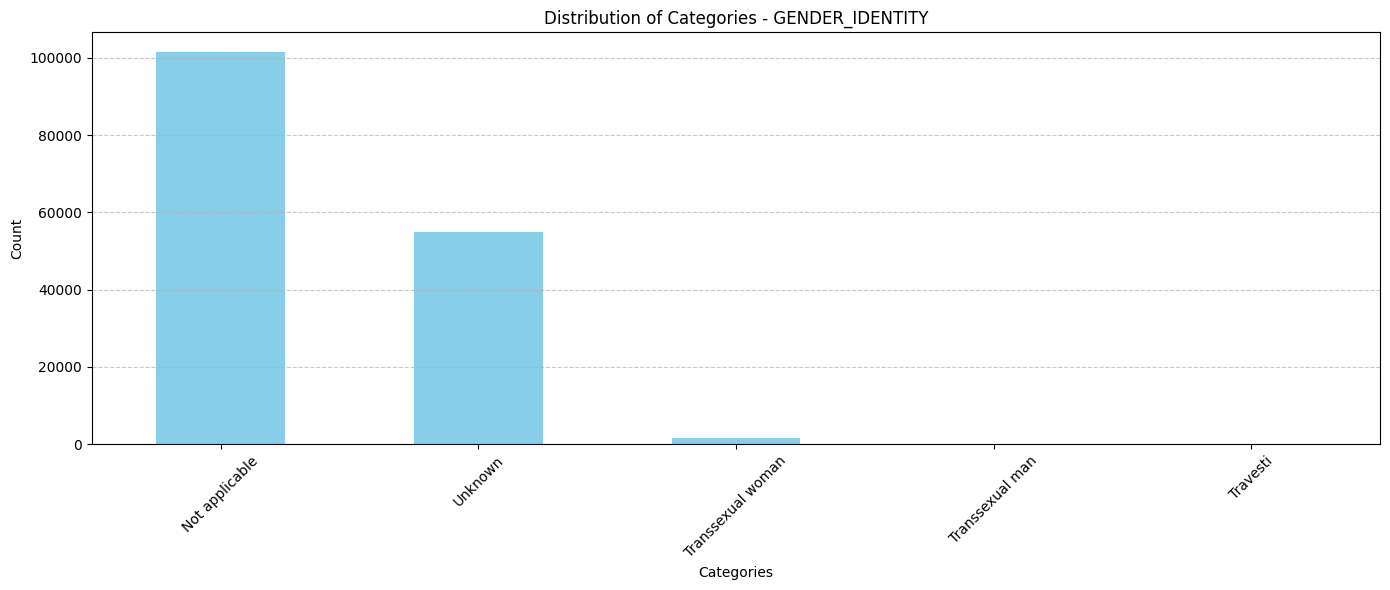

In [232]:
# Gender Identity Distribution
contagem_id_gen = df_woman['GENDER_IDENTITY'].value_counts()

# Plot into a bar chart
plt.figure(figsize=(14, 6))
contagem_id_gen.plot(kind='bar', color='skyblue')
plt.title('Distribution of Categories - GENDER_IDENTITY')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The above graph shows the lack of relevant data to consider the distribution of gender identity among the authors. Although this is not directly related to the theme of this analysis, it may indicate a **lack of knowledge regarding terms related to gender identity within the population, specifically among women who have experienced aggression.**

##### 3.2.2.2 Association Analysis

After individually analyzing the frequency distribution of each categorical variable, the next step is to investigate possible associations/correlations/relationships between these variables.

The cross-tabulation method will be used to verify the relationship between two **categorical** variables. It is also possible to use some more in-depth statistical methods **if necessary**. These include:

* **Contingency Table Analysis** - involves creating a contingency table that displays the frequency counts or percentages of observations that fall into various categories defined by the variables being analyzed. Each cell in the table represents the count of observations that belong to a specific combination of categories from the variables.
* **Chi-Square Coefficient** - evaluates the difference between observed and expected frequencies in categorical data, indicating whether there is an association between variables in a contingency table. It is used to test independence or significant association between categorical variables, such as gender and product preference, race and survey outcome, applicable in areas like social research, biological sciences, and categorical data analysis.
* **Cramer's Coefficient** - used to measure the association between categorical variables in contingency tables larger than 2x2. It ranges from 0 (no association) to 1 (complete association).
* **Fisher's Exact Test** - a powerful tool for assessing the association between two categorical variables in 2x2 contingency tables, where each variable has two categories. It calculates the probability of obtaining the observed frequency distribution under the hypothesis of independence between the variables. This test is particularly useful when dealing with small samples and wishing to determine whether the observed association is statistically significant.
* **Contingency Coefficient** - The contingency coefficient is a measure of association between categorical variables ranging from 0 to 1. It is a generalization of Cramer's V coefficient and is applicable to contingency tables larger than 2x2. This measure takes into account the total size of the table, making it useful for larger tables.
* **Tschuprow's Coefficient** - applicable when measuring the association between ordinal variables, i.e., categorical variables that have a natural order. It is an extension of the Chi-Square coefficient for ordinal variables and takes into account the order of categories. This coefficient is valuable when analyzing data that has an intrinsic hierarchy, such as levels of education or customer satisfaction ratings.
* **Phi Coefficient** - Used to measure the association between binary variables in 2x2 contingency tables. It is a version of Cramer's coefficient for 2x2 tables.


###### 3.2.2.2.1 Sexual Orientation vs. Gender of Authors


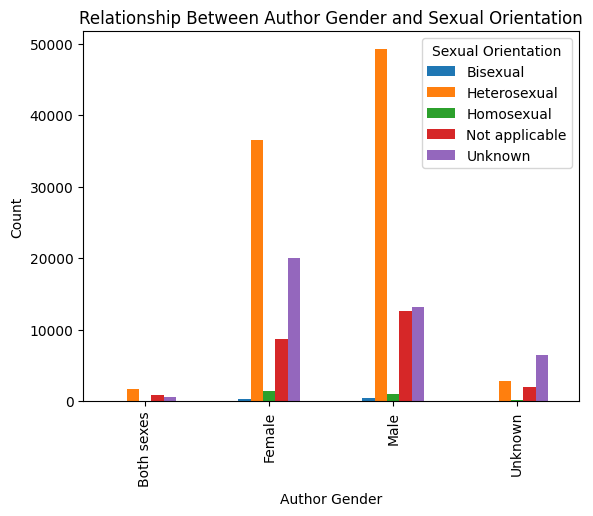

In [233]:
# Analysis Between Sexual Orientation vs. Gender of Authors
sexo_autor_vs_sex_orientation = pd.crosstab(index = df_woman['PERPETRATOR_SEX'], columns = df_woman['SEXUAL_ORIENTATION'])

# Plot into a bar chart
sexo_autor_vs_sex_orientation.plot(kind='bar')
plt.xlabel('Author Gender')
plt.ylabel('Count')
plt.title('Relationship Between Author Gender and Sexual Orientation')
plt.legend(title='Sexual Orientation')
plt.show()


With the analysis above, it is noted that a very small portion of female authors are homosexual. **It can be concluded that a large portion of aggression against women occurs in familial environments or among supposed friends.**

###### 3.2.2.2.2 Race vs. Location of Occurrence


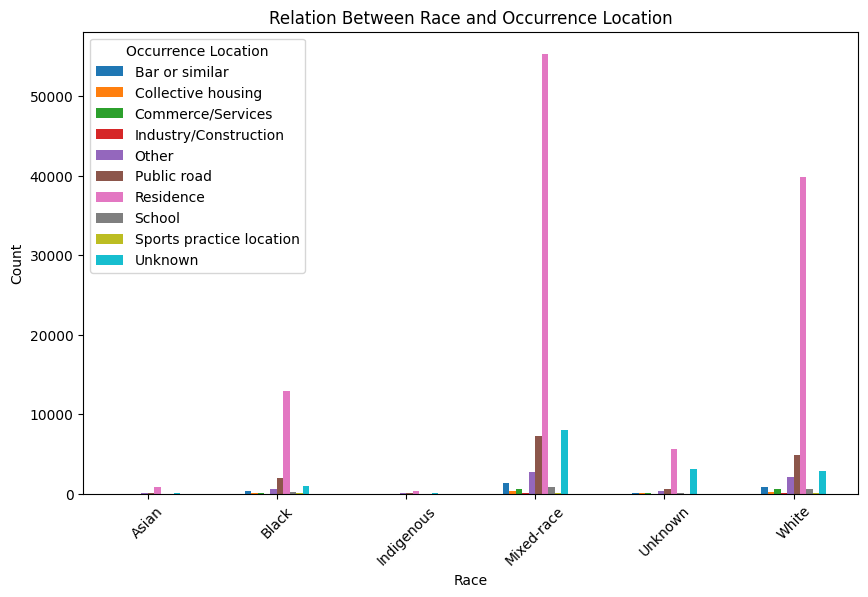

In [234]:
# Analysis between Race vs. Location of Occurrence
race_vs_occurrence_location = pd.crosstab(index = df_woman['RACE_CODE'], columns = df_woman['OCCURRENCE_LOCATION'])

# Plot into a bar chart
race_vs_occurrence_location.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Relation Between Race and Occurrence Location')
plt.legend(title='Occurrence Location')
plt.xticks(rotation=45)
plt.show()

In the correlation analysis above, it is noted that for the "parda" race, even though the location of occurrence remains the residence (as it is for all other races), **the "mixed-race" race is the one with the highest number of aggressions in public places.**

###### 3.2.2.2.3 Physical Violence vs Self Harm


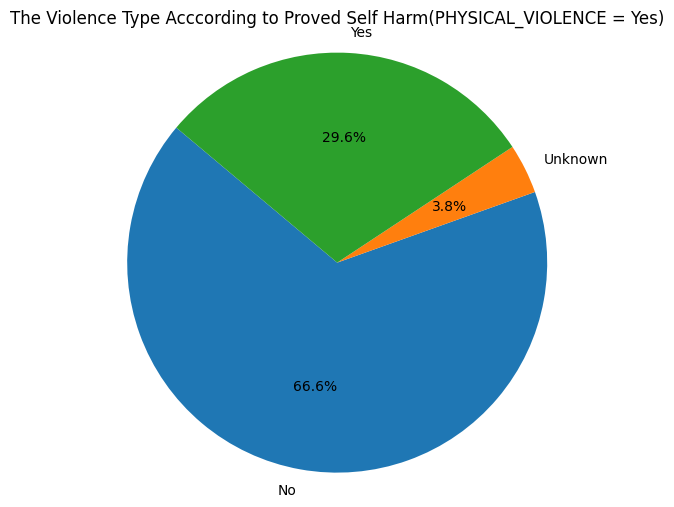

In [235]:
# Filtering the DataFrame to include only the values "Yes" in PHYSICAL_VIOLENCE
df_viol_fisic_filtered = df_woman[df_woman['PHYSICAL_VIOLENCE'] == 'Yes']

# Creating the contingency table between PHYSICAL_VIOLENCE and SELF_HARM after filtering
violence_type = pd.crosstab(index=df_viol_fisic_filtered['PHYSICAL_VIOLENCE'], columns=df_viol_fisic_filtered['SELF_HARM'])

# Checking if there is data in the contingency table
if violence_type.empty:
    print("There is no data to plot")
else:
    # Obtaining the values for the slices of the pie chart (unidimensional)
    values = violence_type.values.flatten()

    # Plotting the pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(values, labels=violence_type.columns, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title('The Violence Type Acccording to Proved Self Harm(PHYSICAL_VIOLENCE = Yes)')
    plt.show()



With the analysis above, it is noted that 66.6% of physical violence against women did not result in bodily injury requiring medical attention. Therefore, **it is possible to indicate a high probability that the reported aggressions are of a mild nature.**

#### 3.2.3 Quantitative vs. Qualitative Variables
Now, we will perform analyses combining the quantitative variable with the categorical ones.

##### 3.2.3.1 Association Analysis

Association analyses have already been initiated between categorical variables; now, they will be conducted again, but combining both types of variables. In this case, as there is only one quantitative variable, age, the association will always be based on age.

To analyze a categorical variable with a quantitative variable, it is possible to use functions such as groupby in combination with descriptive statistics or even graphs like boxplots or bar charts to visualize the relationship between these variables.


###### 3.2.3.1.1 Age vs Race

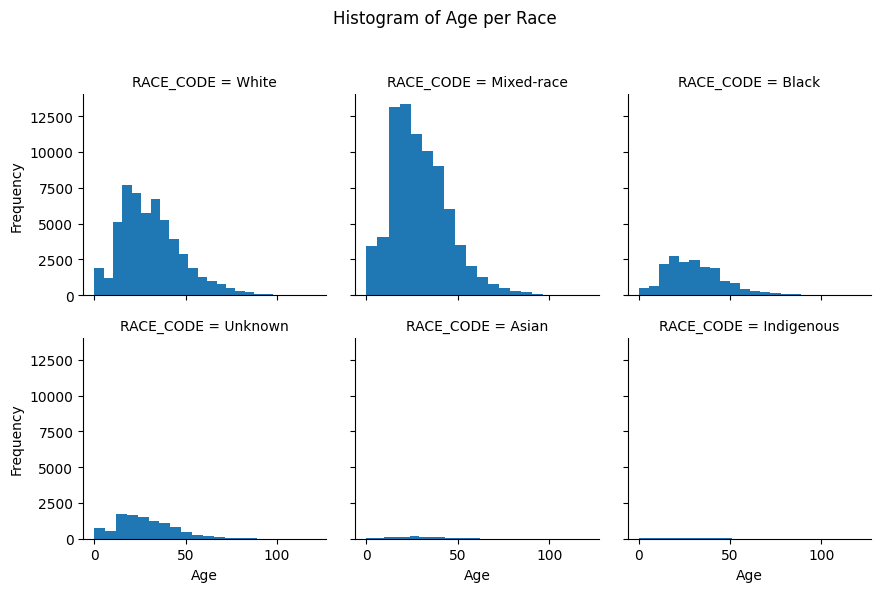

In [236]:
# Plot into Histogram
g = sns.FacetGrid(df_woman, col='RACE_CODE', col_wrap=3)
g.map(plt.hist, 'AGE_NUMBER', bins=20)
g.set_axis_labels('Age', 'Frequency')
plt.suptitle('Histogram of Age per Race')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [237]:
# Statistic Check
statistics_per_race = df_woman.groupby('RACE_CODE')['AGE_NUMBER'].describe()

# Check Result
statistics_per_race

,count,mean,std,min,25%,50%,75%,max
RACE_CODE,,,,,,,,
Asian,1131.0,30.053050,15.443726,0.0,19.0,28.0,39.5,96.0
Black,17751.0,30.747676,15.615674,0.0,19.0,29.0,40.0,111.0
Indigenous,566.0,23.540636,16.008436,0.0,11.0,22.0,34.0,85.0
Mixed-race,79008.0,29.468029,15.427541,0.0,18.0,27.0,39.0,121.0
Unknown,10417.0,28.002880,16.203321,0.0,16.0,26.0,38.0,119.0
White,53506.0,31.208818,16.527970,0.0,19.0,29.0,41.0,103.0


It is noted that for all races, the age range of 20 years old continues to be the range in which the most events of violence against women occur.

###### 3.2.3.1.2 Age vs Physical Violence

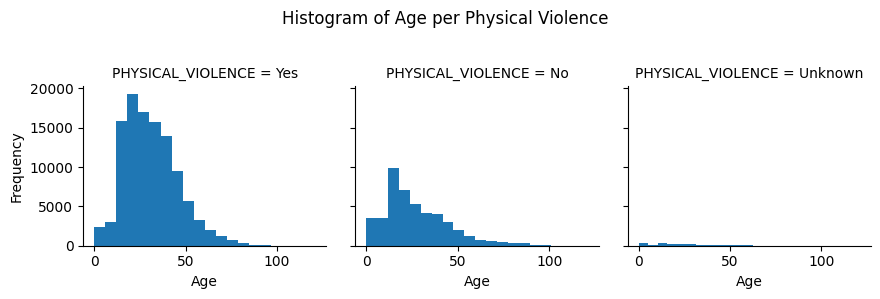

In [238]:
# Plot into Histogram
g = sns.FacetGrid(df_woman, col='PHYSICAL_VIOLENCE', col_wrap=3)
g.map(plt.hist, 'AGE_NUMBER', bins=20)
g.set_axis_labels('Age', 'Frequency')
plt.suptitle('Histogram of Age per Physical Violence')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [239]:
# Statistic Check
statistics_per_physical_violence = df_woman.groupby('PHYSICAL_VIOLENCE')['AGE_NUMBER'].describe()

# Check Result
statistics_per_physical_violence

,count,mean,std,min,25%,50%,75%,max
PHYSICAL_VIOLENCE,,,,,,,,
No,46251.0,27.065123,17.857878,0.0,14.0,23.0,37.00,119.0
Unknown,2066.0,24.618103,19.478922,0.0,11.0,20.0,35.75,104.0
Yes,109924.0,31.424411,14.635790,0.0,20.0,30.0,40.00,121.0


Comparing age with incidents of physical violence, **it is noted that there are higher values at younger ages (age < 25 years old).**

###### 3.2.3.1.3 Age vs Psycological Violence

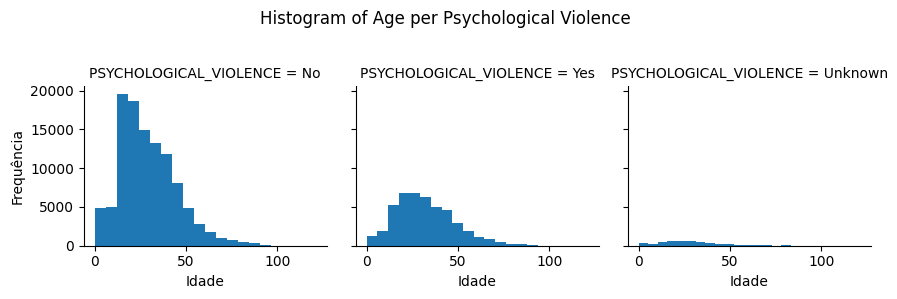

In [240]:
# Plot into Histogram
g = sns.FacetGrid(df_woman, col='PSYCHOLOGICAL_VIOLENCE', col_wrap=3)
g.map(plt.hist, 'AGE_NUMBER', bins=20)
g.set_axis_labels('Idade', 'Frequência')
plt.suptitle('Histogram of Age per Psychological Violence')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [241]:
# Statistic Check
statistics_per_psychological_violence = df_woman.groupby('PSYCHOLOGICAL_VIOLENCE')['AGE_NUMBER'].describe()

# Check Result
statistics_per_psychological_violence

,count,mean,std,min,25%,50%,75%,max
PSYCHOLOGICAL_VIOLENCE,,,,,,,,
No,108237.0,29.273991,15.595015,0.0,18.0,27.0,39.0,121.0
Unknown,4315.0,27.644264,17.018663,0.0,16.0,25.0,37.0,104.0
Yes,45650.0,32.157262,16.133575,0.0,20.0,30.0,42.0,117.0


Comparing age with incidents of psychological violence, **it is noted that the histogram is slightly more continuous over the years, until around the age of 40-50, unlike physical violence which is predominantly in younger women.**

###### 3.2.3.1.4 Age vs Sexual Violence

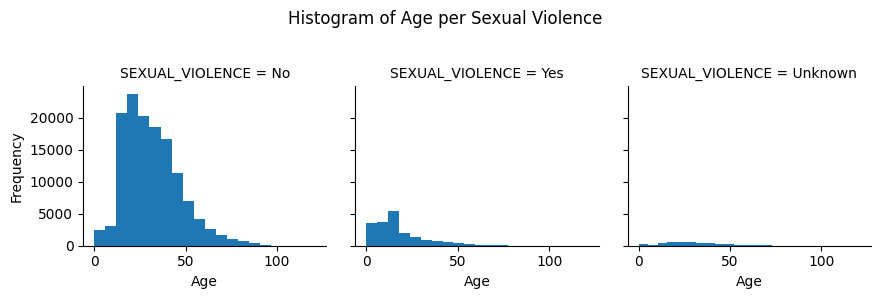

In [242]:
# Plot into Histogram
g = sns.FacetGrid(df_woman, col='SEXUAL_VIOLENCE', col_wrap=3)
g.map(plt.hist, 'AGE_NUMBER', bins=20)
g.set_axis_labels('Age', 'Frequency')
plt.suptitle('Histogram of Age per Sexual Violence')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [243]:
# Statistic Check
statistics_per_sexual_violence = df_woman.groupby('SEXUAL_VIOLENCE')['AGE_NUMBER'].describe()

# Check Result
statistics_per_sexual_violence

,count,mean,std,min,25%,50%,75%,max
SEXUAL_VIOLENCE,,,,,,,,
No,134888.0,31.851358,15.242562,0.0,20.0,30.0,41.0,121.0
Unknown,4071.0,30.201916,16.186930,0.0,19.0,28.0,39.5,104.0
Yes,19234.0,17.476708,14.171833,0.0,8.0,13.0,23.0,119.0


Comparing age with incidents of sexual violence, **it is noted that the values in the histogram are predominantly higher for considerably younger ages (range from 15 to 20 years old, with an average around 17), an important aspect considering these incidents involve underage women.**

### 3.3 Final Insights

With the analyses conducted in this section, it is possible to answer the questions included at the beginning of the project:

1. **What is the most common type of violence against women in Minas Gerais?**
   A: The most common type of violence against women in the state of Minas Gerais is physical violence. Predominantly occurring in women in their twenties.

2. **Is there an age group in which incidents of violence against women are more frequent?**
   A: Yes. The age group of 20 years old is the most common. However, some differences were noted regarding the type of violence (physical, psychological, and sexual). For physical violence, the age group of 20 years old is more common. For psychological violence, the age range remains more stable over the years. Finally, for sexual violence, the most common age group is between 15 and 20 years old.

3. **What is the most common location of incidents of violence against women?**
   A: The most common location of incidents of violence against women is in their own residence.

4. **Are incidents of violence isolated? Were there other aggressions?**
   A: About 40% of the aggressions are isolated incidents, however, another 40% indicated that there have been previous occurrences.

5. **Regarding the race of the victims, is there a predominant one?**
   A: Yes, women of mixed race are the victims who suffer the most violence, followed by white women.

It is important to note that other insights were also discovered. These are described in the descriptive analysis.


## 4 Data Preprocessing

Data preprocessing is a crucial step in data analysis, involving cleaning, transforming, and organizing raw data. This process aims to ensure the quality, consistency, and proper preparation of data for subsequent analyses, directly impacting the accuracy and reliability of the results obtained.

### 4.1 Transformation to Binary

Converting categorical data into numerical form is crucial for data analysis and model building. This transformation allows machine learning algorithms to process these data, as many algorithms require numerical inputs.

When dealing with categorical variables without a natural order relationship, such as colors, types of products, or non-hierarchical categories, Label Encoder is not the best choice. It assigns sequential numerical values, which can introduce an artificial order in the data. In these cases, One-Hot Encoding, which transforms the categories into separate binary variables, is more appropriate. It preserves the independence of categories and avoids introducing an order that does not exist in the original data, making it a more suitable option for machine learning models.

In [244]:
# Creating a list of categorical columns
categorical_columns = [
    'SEX_CODE', 'RACE_CODE',
    'OCCURRENCE_LOCATION', 'OTHER_TIMES', 'SELF_HARM', 'PHYSICAL_VIOLENCE', 'PSYCHOLOGICAL_VIOLENCE',
    'SEXUAL_VIOLENCE', 'NUMBER_OF_INVOLVED', 'PERPETRATOR_SEX', 'SEXUAL_ORIENTATION', 'GENDER_IDENTITY'
]

In [245]:
# Applying one-hot encoding
df_encoded = pd.get_dummies(df_woman, columns=categorical_columns)

In [246]:
# Changing names of columns to upper case
df_encoded.columns = df_encoded.columns.str.upper()

# Removing commas from names
def remove_acentos(s):
    return ''.join((c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn'))

df_encoded.columns = [remove_acentos(col).upper() for col in df_encoded.columns]

# Replacing spaces for underscores in colum names
df_encoded.columns = df_encoded.columns.str.replace(' ', '_')

In [247]:
# Chek first rows
df_encoded.head()

,NOTIFICATION_DATE,DATE_OF_BIRTH,AGE_NUMBER,RESIDENCE_CITY_ID,SEX_CODE_FEMALE,RACE_CODE_ASIAN,RACE_CODE_BLACK,RACE_CODE_INDIGENOUS,RACE_CODE_MIXED-RACE,RACE_CODE_UNKNOWN,...,SEXUAL_ORIENTATION_BISEXUAL,SEXUAL_ORIENTATION_HETEROSEXUAL,SEXUAL_ORIENTATION_HOMOSEXUAL,SEXUAL_ORIENTATION_NOT_APPLICABLE,SEXUAL_ORIENTATION_UNKNOWN,GENDER_IDENTITY_NOT_APPLICABLE,GENDER_IDENTITY_TRANSSEXUAL_MAN,GENDER_IDENTITY_TRANSSEXUAL_WOMAN,GENDER_IDENTITY_TRAVESTI,GENDER_IDENTITY_UNKNOWN
0,2023-01-02,2008-03-21,14.0,Rio Novo,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,2023-01-01,1976-11-29,46.0,Carmo do Rio Claro,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,2023-01-02,1997-05-10,25.0,Pirapora,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
3,2023-01-02,1982-10-02,40.0,Várzea da Palma,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,2023-01-03,2016-11-10,6.0,Guaraciaba,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


In [248]:
# Creating a list of columns to be dropepd
encoded_dropped_columns = [
    'NOTIFICATION_DATE', 'DATE_OF_BIRTH', 'AGE_NUMBER', 'RESIDENCE_CITY_ID'
]

# Drop non used columns
df_encoded_droped = df_encoded.drop(encoded_dropped_columns, axis = 1)

In [249]:
# Check Results
encoded_dropped_columns

['NOTIFICATION_DATE', 'DATE_OF_BIRTH', 'AGE_NUMBER', 'RESIDENCE_CITY_ID']

### 4.2 Dataset Concatenation
Now, the columns from the "categorical_columns" list created in the previous step will be dropped, and the new binary columns will be added.


In [250]:
categorical_columns = [
    'SEX_CODE', 'RACE_CODE',
    'OCCURRENCE_LOCATION', 'OTHER_TIMES', 'SELF_HARM', 'PHYSICAL_VIOLENCE', 'PSYCHOLOGICAL_VIOLENCE',
    'SEXUAL_VIOLENCE', 'NUMBER_OF_INVOLVED', 'PERPETRATOR_SEX', 'SEXUAL_ORIENTATION', 'GENDER_IDENTITY'
]

# Drop in columns of df_encoded that are in categorical_columns of df_woman
df_woman_without_categoricals = df_woman.drop(categorical_columns, axis=1)

# Check result
df_woman_without_categoricals

,NOTIFICATION_DATE,DATE_OF_BIRTH,AGE_NUMBER,RESIDENCE_CITY_ID
0,2023-01-02,2008-03-21,14.0,Rio Novo
1,2023-01-01,1976-11-29,46.0,Carmo do Rio Claro
2,2023-01-02,1997-05-10,25.0,Pirapora
3,2023-01-02,1982-10-02,40.0,Várzea da Palma
4,2023-01-03,2016-11-10,6.0,Guaraciaba
...,...,...,...,...
38771,08/03/2019,02/08/1983,35.0,Porteirinha
38772,21/05/2019,31/05/2002,16.0,Porteirinha
38773,20/05/2019,31/03/2007,12.0,Cláudio
38774,19/09/2019,29/01/1986,32.0,Nova Lima


Finally, it is possible to concatenate the binary dataframe with the initial dataframe, thus creating a new df_woman.

In [251]:
# Redefining index of dataframes after concatenation
df_woman_without_categoricals.reset_index(drop=True, inplace=True)
df_encoded_droped.reset_index(drop=True, inplace=True)

# Concatenating dataframes again
df_woman = pd.concat([df_woman_without_categoricals, df_encoded_droped], axis=1)

# Check result
df_woman.head(5)

,NOTIFICATION_DATE,DATE_OF_BIRTH,AGE_NUMBER,RESIDENCE_CITY_ID,SEX_CODE_FEMALE,RACE_CODE_ASIAN,RACE_CODE_BLACK,RACE_CODE_INDIGENOUS,RACE_CODE_MIXED-RACE,RACE_CODE_UNKNOWN,...,SEXUAL_ORIENTATION_BISEXUAL,SEXUAL_ORIENTATION_HETEROSEXUAL,SEXUAL_ORIENTATION_HOMOSEXUAL,SEXUAL_ORIENTATION_NOT_APPLICABLE,SEXUAL_ORIENTATION_UNKNOWN,GENDER_IDENTITY_NOT_APPLICABLE,GENDER_IDENTITY_TRANSSEXUAL_MAN,GENDER_IDENTITY_TRANSSEXUAL_WOMAN,GENDER_IDENTITY_TRAVESTI,GENDER_IDENTITY_UNKNOWN
0,2023-01-02,2008-03-21,14.0,Rio Novo,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,2023-01-01,1976-11-29,46.0,Carmo do Rio Claro,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,2023-01-02,1997-05-10,25.0,Pirapora,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
3,2023-01-02,1982-10-02,40.0,Várzea da Palma,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,2023-01-03,2016-11-10,6.0,Guaraciaba,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


### 4.3 Checking and Removing Nulls and NaNs

During the data preprocessing phase, checking and removing missing values are essential steps. Identifying and handling null values or NaNs is crucial as they can arise from data collection errors or missing information. Strategies include removing rows/columns or filling them with descriptive statistics. The choice depends on the impact on the data and is crucial for accurate analyses and robust models.

<Axes: >

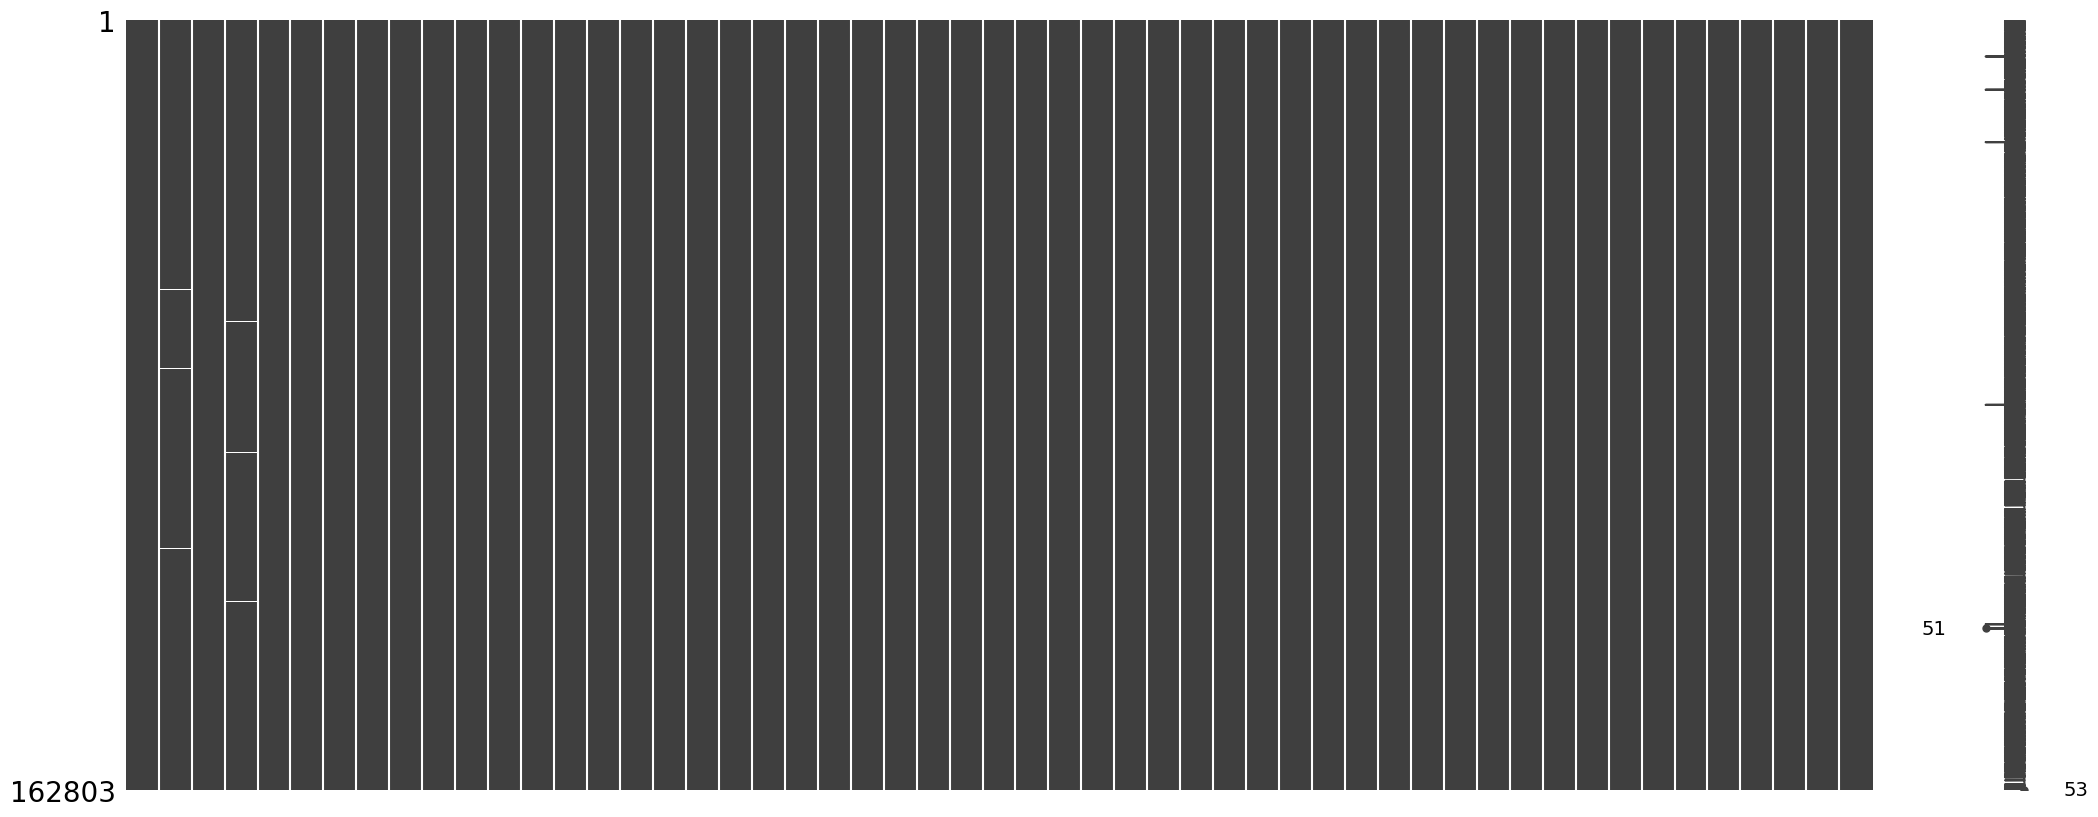

In [252]:
# Verification of  Nan / Nulls / Missings

ms.matrix(df_woman)

With the above graph, it is possible to verify that there are null values in the dataset (also confirmed in the analysis). Therefore, it will be necessary to handle them.

In [253]:
# Treatment of NaN Values
# Since there are not many rows with NaN values and they are all qualitative variables, it makes sense to remove them from the dataset
# Remove rows containing NaN values in any column
df_woman.dropna(inplace=True)

In [254]:
# Check if the previous code was properly performed
nan_values = df_woman[df_woman.isna().any(axis=1)]
print("NaN Values:")
print(nan_values)

NaN Values:
Empty DataFrame
Columns: [NOTIFICATION_DATE, DATE_OF_BIRTH, AGE_NUMBER, RESIDENCE_CITY_ID, SEX_CODE_FEMALE, RACE_CODE_ASIAN, RACE_CODE_BLACK, RACE_CODE_INDIGENOUS, RACE_CODE_MIXED-RACE, RACE_CODE_UNKNOWN, RACE_CODE_WHITE, OCCURRENCE_LOCATION_BAR_OR_SIMILAR, OCCURRENCE_LOCATION_COLLECTIVE_HOUSING, OCCURRENCE_LOCATION_COMMERCE/SERVICES, OCCURRENCE_LOCATION_INDUSTRY/CONSTRUCTION, OCCURRENCE_LOCATION_OTHER, OCCURRENCE_LOCATION_PUBLIC_ROAD, OCCURRENCE_LOCATION_RESIDENCE, OCCURRENCE_LOCATION_SCHOOL, OCCURRENCE_LOCATION_SPORTS_PRACTICE_LOCATION, OCCURRENCE_LOCATION_UNKNOWN, OTHER_TIMES_NO, OTHER_TIMES_UNKNOWN, OTHER_TIMES_YES, SELF_HARM_NO, SELF_HARM_UNKNOWN, SELF_HARM_YES, PHYSICAL_VIOLENCE_NO, PHYSICAL_VIOLENCE_UNKNOWN, PHYSICAL_VIOLENCE_YES, PSYCHOLOGICAL_VIOLENCE_NO, PSYCHOLOGICAL_VIOLENCE_UNKNOWN, PSYCHOLOGICAL_VIOLENCE_YES, SEXUAL_VIOLENCE_NO, SEXUAL_VIOLENCE_UNKNOWN, SEXUAL_VIOLENCE_YES, NUMBER_OF_INVOLVED_ONE, NUMBER_OF_INVOLVED_TWO_OR_MORE, NUMBER_OF_INVOLVED_UNKNOWN, PER

<Axes: >

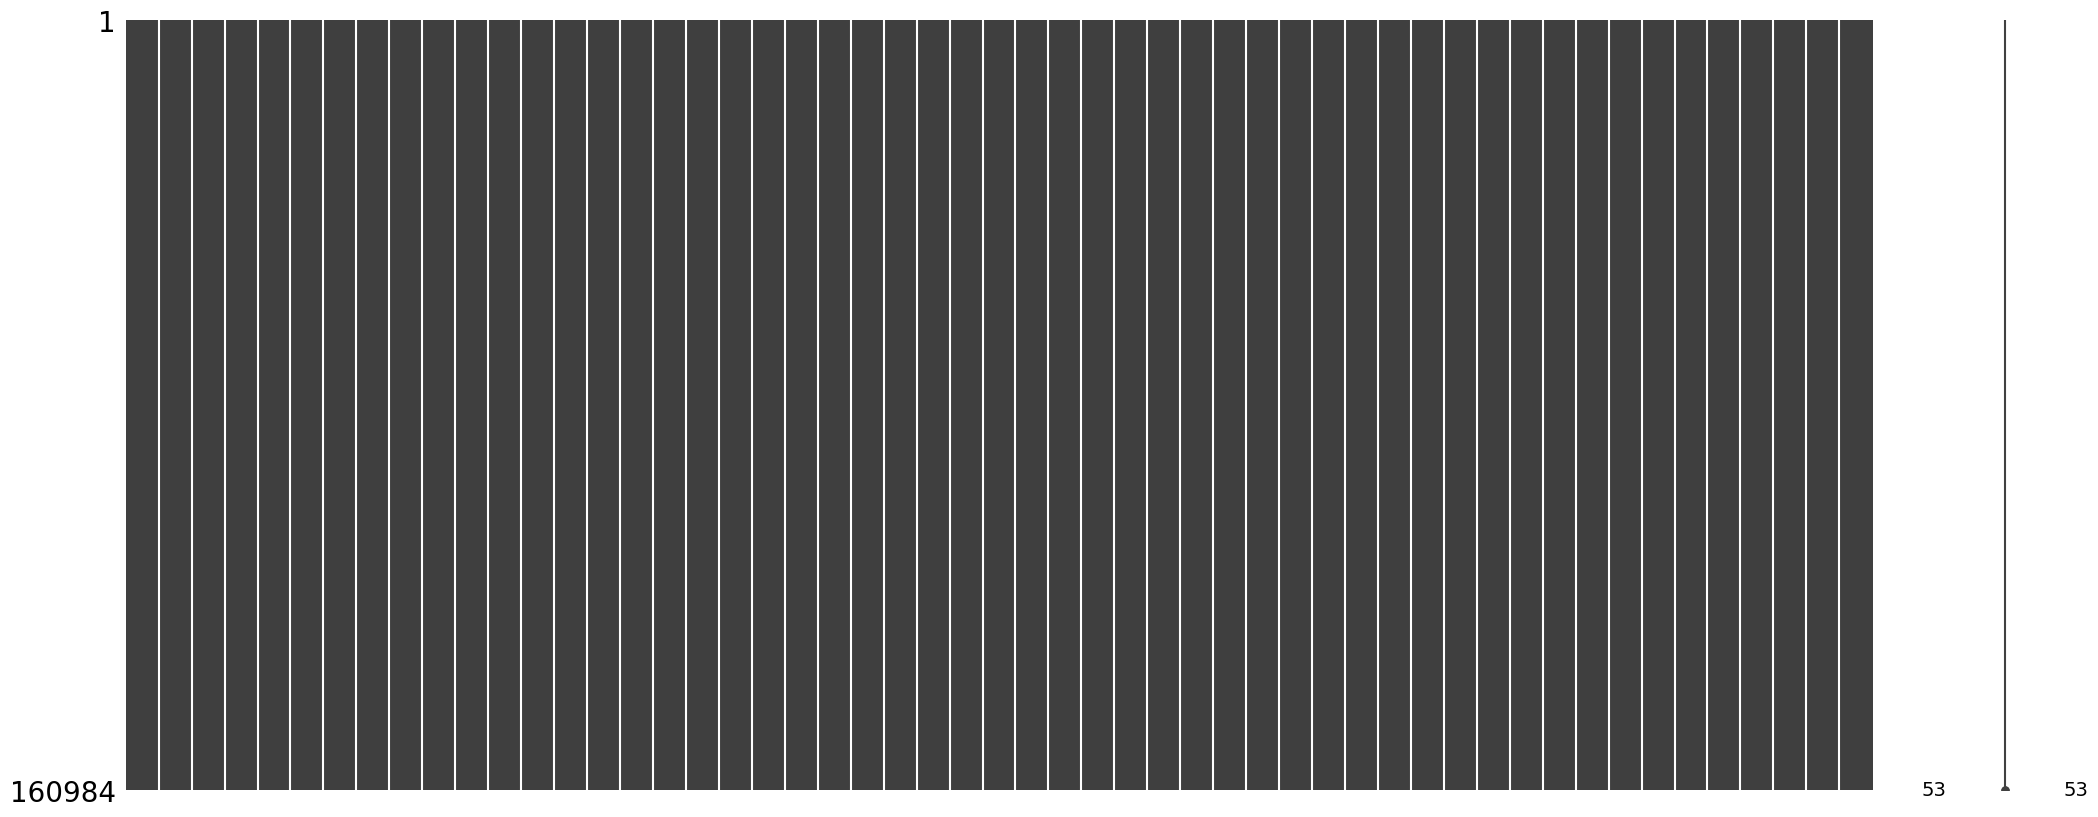

In [255]:
# Check if the previous code was properly done
ms.matrix(df_woman)

In [256]:
# Validation of nulls removal
null_values = df_woman[df_woman.isnull().any(axis=1)]

# Check result
null_values

,NOTIFICATION_DATE,DATE_OF_BIRTH,AGE_NUMBER,RESIDENCE_CITY_ID,SEX_CODE_FEMALE,RACE_CODE_ASIAN,RACE_CODE_BLACK,RACE_CODE_INDIGENOUS,RACE_CODE_MIXED-RACE,RACE_CODE_UNKNOWN,...,SEXUAL_ORIENTATION_BISEXUAL,SEXUAL_ORIENTATION_HETEROSEXUAL,SEXUAL_ORIENTATION_HOMOSEXUAL,SEXUAL_ORIENTATION_NOT_APPLICABLE,SEXUAL_ORIENTATION_UNKNOWN,GENDER_IDENTITY_NOT_APPLICABLE,GENDER_IDENTITY_TRANSSEXUAL_MAN,GENDER_IDENTITY_TRANSSEXUAL_WOMAN,GENDER_IDENTITY_TRAVESTI,GENDER_IDENTITY_UNKNOWN


With the result above, it is noted that the removal of nulls and NaNs was successful.

### 4.4 Outlier Removal
An outlier is an unusual or aberrant value in a dataset that significantly deviates from the rest of the distribution, potentially distorting statistical analyses or graphical visualizations.

Outlier removal is the process of identifying and eliminating data points that deviate significantly from the observed pattern in the majority of the data. This is done to improve the accuracy of statistical analyses, modeling, or visualization of the data by removing extreme values that may distort the results and impair the correct interpretation of the data.

**As already verified, there are outliers in the AGE column, as there are values above 100 (years), reaching 117. Since they are few, these values will be removed.**

In [257]:
# Removal of vales higher than 100
df_woman = df_woman.drop(df_woman[df_woman['AGE_NUMBER'] >= 100].index)

In [258]:
# Verification if the drop was properly done
df_woman[df_woman['AGE_NUMBER'] > 100]

,NOTIFICATION_DATE,DATE_OF_BIRTH,AGE_NUMBER,RESIDENCE_CITY_ID,SEX_CODE_FEMALE,RACE_CODE_ASIAN,RACE_CODE_BLACK,RACE_CODE_INDIGENOUS,RACE_CODE_MIXED-RACE,RACE_CODE_UNKNOWN,...,SEXUAL_ORIENTATION_BISEXUAL,SEXUAL_ORIENTATION_HETEROSEXUAL,SEXUAL_ORIENTATION_HOMOSEXUAL,SEXUAL_ORIENTATION_NOT_APPLICABLE,SEXUAL_ORIENTATION_UNKNOWN,GENDER_IDENTITY_NOT_APPLICABLE,GENDER_IDENTITY_TRANSSEXUAL_MAN,GENDER_IDENTITY_TRANSSEXUAL_WOMAN,GENDER_IDENTITY_TRAVESTI,GENDER_IDENTITY_UNKNOWN


### 4.5 Data Type Conversion

This transformation is crucial to ensure compatibility with the analytical techniques used and to optimize model accuracy. Date columns will be transformed into datetime. Since the data is in float64 and represents integers, it will be converted from float to int. Binary columns will be kept as uint8.

First, the data will be converted from float64 to integers.

In [259]:
# Convert columns from 'float64' to 'int'
for col in df_woman.select_dtypes(include='float64').columns:
    df_woman[col] = df_woman[col].astype(int)

Now, the conversion will be performed for the date columns.

In [260]:
# List of columns of data that should be converted to datetime
data_columns = ['NOTIFICATION_DATE', 'DATE_OF_BIRTH']

# Convert columns to datetime
for col in data_columns:
    df_woman[col] = pd.to_datetime(df_woman[col])

<ipython-input-260-65d5d4ef2a17>:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_woman[col] = pd.to_datetime(df_woman[col])
<ipython-input-260-65d5d4ef2a17>:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_woman[col] = pd.to_datetime(df_woman[col])


In [261]:
# Verification if the changes were properly done

df_woman.dtypes

NOTIFICATION_DATE                               datetime64[ns]
DATE_OF_BIRTH                                   datetime64[ns]
AGE_NUMBER                                               int64
RESIDENCE_CITY_ID                                       object
SEX_CODE_FEMALE                                          uint8
RACE_CODE_ASIAN                                          uint8
RACE_CODE_BLACK                                          uint8
RACE_CODE_INDIGENOUS                                     uint8
RACE_CODE_MIXED-RACE                                     uint8
RACE_CODE_UNKNOWN                                        uint8
RACE_CODE_WHITE                                          uint8
OCCURRENCE_LOCATION_BAR_OR_SIMILAR                       uint8
OCCURRENCE_LOCATION_COLLECTIVE_HOUSING                   uint8
OCCURRENCE_LOCATION_COMMERCE/SERVICES                    uint8
OCCURRENCE_LOCATION_INDUSTRY/CONSTRUCTION                uint8
OCCURRENCE_LOCATION_OTHER                              


It is noted that now the columns of type "float64" have been converted to integers and the date columns ('DT_NOTIFIC', 'DT_NASC', etc.) have been converted to "datetime".

In [262]:
# Dataset verification

df_woman.head()

,NOTIFICATION_DATE,DATE_OF_BIRTH,AGE_NUMBER,RESIDENCE_CITY_ID,SEX_CODE_FEMALE,RACE_CODE_ASIAN,RACE_CODE_BLACK,RACE_CODE_INDIGENOUS,RACE_CODE_MIXED-RACE,RACE_CODE_UNKNOWN,...,SEXUAL_ORIENTATION_BISEXUAL,SEXUAL_ORIENTATION_HETEROSEXUAL,SEXUAL_ORIENTATION_HOMOSEXUAL,SEXUAL_ORIENTATION_NOT_APPLICABLE,SEXUAL_ORIENTATION_UNKNOWN,GENDER_IDENTITY_NOT_APPLICABLE,GENDER_IDENTITY_TRANSSEXUAL_MAN,GENDER_IDENTITY_TRANSSEXUAL_WOMAN,GENDER_IDENTITY_TRAVESTI,GENDER_IDENTITY_UNKNOWN
0,2023-01-02,2008-03-21,14,Rio Novo,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,2023-01-01,1976-11-29,46,Carmo do Rio Claro,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,2023-01-02,1997-05-10,25,Pirapora,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
3,2023-01-02,1982-10-02,40,Várzea da Palma,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,2023-01-03,2016-11-10,6,Guaraciaba,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


### 4.5 Separation of Date Columns

Separating date columns into year, month, and day is a common and useful practice in exploratory data analysis. By splitting a date column into individual components (year, month, day), it becomes easier to analyze and visualize the data when exploring seasonal patterns, trends over time, or performing specific aggregations by year, month, or day. This also allows for more detailed visualizations, such as time series plots by year or by month, making it easier to understand patterns in the data over time.

First, new columns will be created for year, month, and day with different names for the column **NOTIFICATION_DATE**.


In [263]:
# Creating new columns for year, onth and day with different names for the columns NOTIFICATION_DATE
df_woman['YEAR_NOTIFICATION'] = df_woman['NOTIFICATION_DATE'].dt.year
df_woman['MONTH_NOTIFICATION'] = df_woman['NOTIFICATION_DATE'].dt.month
df_woman['DAY_NOTIFICATION'] = df_woman['NOTIFICATION_DATE'].dt.day

In [264]:
# Getting the position of the columns NOTIFICATION_DATE
pos_not_date = df_woman.columns.get_loc('NOTIFICATION_DATE')

# Check result
pos_not_date

0

In [265]:
# List with the names of the new columns in the desired order
new_columns = ['YEAR_NOTIFICATION', 'MONTH_NOTIFICATION', 'DAY_NOTIFICATION']

# Inserting the new columns after the 'MONTH_NOTIFICATION' column.
for idx, col in enumerate(new_columns, start=1):
    df_woman.insert(pos_not_date + idx, col, df_woman.pop(col))

Finally, new columns will be created for year, month, and day with different names for the column **NOTIFICATION_DATE**.

In [266]:
# Creating new columns for year, month, and day of birth for the column DATE_OF_BIRTH
df_woman['YEAR_OF_BIRTH'] = df_woman['DATE_OF_BIRTH'].dt.year
df_woman['MONTH_OF_BIRTH'] = df_woman['DATE_OF_BIRTH'].dt.month
df_woman['DAY_OF_BIRTH'] = df_woman['DATE_OF_BIRTH'].dt.day

In [267]:
# Getting the position of the columns DATE_OF_BIRTH
pos_date_of_birth = df_woman.columns.get_loc('DATE_OF_BIRTH')

# Check result
pos_date_of_birth

4

In [268]:
# List with new columns in the correct order
new_columns_birth = ['YEAR_OF_BIRTH', 'MONTH_OF_BIRTH', 'DAY_OF_BIRTH']

# Inserting new columns after 'DATE_OF_BIRTH'
for idx, col in enumerate(new_columns_birth, start=1):
    df_woman.insert(pos_date_of_birth + idx, col, df_woman.pop(col))


Now, a check will be made to verify if the changes in the dataset were executed correctly.

In [269]:
# Verification if the dataset changes were performed correctly.
df_woman

,NOTIFICATION_DATE,YEAR_NOTIFICATION,MONTH_NOTIFICATION,DAY_NOTIFICATION,DATE_OF_BIRTH,YEAR_OF_BIRTH,MONTH_OF_BIRTH,DAY_OF_BIRTH,AGE_NUMBER,RESIDENCE_CITY_ID,...,SEXUAL_ORIENTATION_BISEXUAL,SEXUAL_ORIENTATION_HETEROSEXUAL,SEXUAL_ORIENTATION_HOMOSEXUAL,SEXUAL_ORIENTATION_NOT_APPLICABLE,SEXUAL_ORIENTATION_UNKNOWN,GENDER_IDENTITY_NOT_APPLICABLE,GENDER_IDENTITY_TRANSSEXUAL_MAN,GENDER_IDENTITY_TRANSSEXUAL_WOMAN,GENDER_IDENTITY_TRAVESTI,GENDER_IDENTITY_UNKNOWN
0,2023-01-02,2023,1,2,2008-03-21,2008,3,21,14,Rio Novo,...,0,1,0,0,0,0,0,0,0,1
1,2023-01-01,2023,1,1,1976-11-29,1976,11,29,46,Carmo do Rio Claro,...,0,1,0,0,0,0,0,0,0,1
2,2023-01-02,2023,1,2,1997-05-10,1997,5,10,25,Pirapora,...,0,1,0,0,0,1,0,0,0,0
3,2023-01-02,2023,1,2,1982-10-02,1982,10,2,40,Várzea da Palma,...,0,1,0,0,0,1,0,0,0,0
4,2023-01-03,2023,1,3,2016-11-10,2016,11,10,6,Guaraciaba,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162798,2019-08-03,2019,8,3,1983-02-08,1983,2,8,35,Porteirinha,...,0,1,0,0,0,1,0,0,0,0
162799,2019-05-21,2019,5,21,2002-05-31,2002,5,31,16,Porteirinha,...,0,1,0,0,0,1,0,0,0,0
162800,2019-05-20,2019,5,20,2007-03-31,2007,3,31,12,Cláudio,...,0,1,0,0,0,1,0,0,0,0
162801,2019-09-19,2019,9,19,1986-01-29,1986,1,29,32,Nova Lima,...,0,0,0,0,1,0,0,0,0,1


### 4.6 New Attributes

Now, with the changes made, the new information in the dataset can be checked below. In the dataset, we have:

* Datetime - For temporal data with dates
* Int64 - For integer numbers
* Uint8 - For binary values (where 0 = no / false, 1 = yes / true)

New Attributes:

| Attribute Name                            | Attribute Description                                      | Attribute Type |
|------------------------------------------|------------------------------------------------------------|----------------|
| NOTIFICATION_DATE                        | Notification Date of the event                             | datetime64     |
| YEAR_NOTIFICATION                        | Notification Year                                          | datetime64     |
| MONTH_NOTIFICATION                       | Notification Month                                         | datetime64     |
| DAY_NOTIFICATION                         | Notification Day                                           | datetime64     |
| DATE_OF_BIRTH                            | Date of Birth                                              | datetime64     |
| YEAR_OF_BIRTH                            | Year of Birth                                              | datetime64     |
| MONTH_OF_BIRTH                           | Month of Birth                                             | datetime64     |
| DAY_OF_BIRTH                             | Day of Birth                                               | datetime64     |
| AGE_NUMBER                               | Number of Age                                              | int64          |
| RESIDENCE_CITY_ID                        | Municipality of Residence Identification                   | object         |
| SEX_CODE_FEMALE                          | Female Sex                                                 | uint8          |
| RACE_CODE_ASIAN                          | Yellow Race                                                | uint8          |
| RACE_CODE_WHITE                          | White Race                                                 | uint8          |
| RACE_CODE_UNKNOWN                        | Unknown Race                                               | uint8          |
| RACE_CODE_INDIGENOUS                     | Indigenous Race                                            | uint8          |
| RACE_CODE_MIXED_RACE                     | Brown Race                                                 | uint8          |
| RACE_CODE_BLACK                          | Black Race                                                 | uint8          |
| OCCURRENCE_LOCATION_BAR_OR_SIMILAR       | Occurrence Location: Bar or Similar                        | uint8          |
| OCCURRENCE_LOCATION_COMMERCE/SERVICES    | Occurrence Location: Commerce/Services                     | uint8          |
| OCCURRENCE_LOCATION_SCHOOL               | Occurrence Location: School                                 | uint8          |
| OCCURRENCE_LOCATION_COLLECTIVE_HOUSING   | Occurrence Location: Collective Housing                    | uint8          |
| OCCURRENCE_LOCATION_UNKNOWN              | Occurrence Location: Unknown                                | uint8          |
| OCCURRENCE_LOCATION_INDUSTRY_CONSTRUCTION| Occurrence Location: Industry/Construction                 | uint8          |
| OCCURRENCE_LOCATION_SPORTS_PRACTICE_LOCATION | Occurrence Location: Sports Practice Location            | uint8          |
| OCCURRENCE_LOCATION_OTHER                | Occurrence Location: Other                                  | uint8          |
| OCCURRENCE_LOCATION_RESIDENCE            | Occurrence Location: Residence                              | uint8          |
| OCCURRENCE_LOCATION_PUBLIC_ROAD          | Occurrence Location: Public Road                            | uint8          |
| OTHER_TIMES_UNKNOWN                      | Other Times: Unknown                                       | uint8          |
| OTHER_TIMES_NO                           | Other Times: No                                            | uint8          |
| OTHER_TIMES_YES                          | Other Times: Yes                                           | uint8          |
| SELF_HARM_UNKNOWN                        | Self-inflicted Injury: Unknown                             | uint8          |
| SELF_HARM_NO                             | Self-inflicted Injury: No                                  | uint8          |
| SELF_HARM_YES                            | Self-inflicted Injury: Yes                                 | uint8          |
| PHYSICAL_VIOLENCE_UNKNOWN                | Physical Violation: Unknown                                | uint8          |
| PHYSICAL_VIOLENCE_NO                     | Physical Violation: No                                     | uint8          |
| PHYSICAL_VIOLENCE_YES                    | Physical Violation: Yes                                    | uint8          |
| PSYCHOLOGICAL_VIOLENCE_UNKNOWN           | Psychological Violation: Unknown                           | uint8          |
| PSYCHOLOGICAL_VIOLENCE_NO                | Psychological Violation: No                                | uint8          |
| PSYCHOLOGICAL_VIOLENCE_YES               | Psychological Violation: Yes                               | uint8          |
| SEXUAL_VIOLENCE_UNKNOWN                  | Sexual Violation: Unknown                                  | uint8          |
| SEXUAL_VIOLENCE_NO                       | Sexual Violation: No                                       | uint8          |
| SEXUAL_VIOLENCE_YES                      | Sexual Violation: Yes                                      | uint8          |
| NUMBER_OF_INVOLVED_TWO_OR_MORE           | Number Involved: Two or More                               | uint8          |
| NUMBER_OF_INVOLVED_UNKNOWN               | Number Involved: Unknown                                   | uint8          |
| NUMBER_OF_INVOLVED_ONE                   | Number Involved: One                                       | uint8          |
| PERPETRATOR_SEX_BOTH_SEXES               | Author: Both Sexes                                         | uint8          |
| PERPETRATOR_SEX_FEMALE                   | Author: Female                                             | uint8          |
| PERPETRATOR_SEX_UNKNOWN                  | Author: Unknown                                            | uint8          |
| PERPETRATOR_SEX_MALE                     | Author: Male                                               | uint8          |
| SEXUAL_ORIENTATION_BISEXUAL              | Sexual Orientation: Bisexual                               | uint8          |
| SEXUAL_ORIENTATION_HETEROSEXUAL          | Sexual Orientation: Heterosexual                           | uint8          |
| SEXUAL_ORIENTATION_HOMOSEXUAL            | Sexual Orientation: Homosexual                             | uint8          |
| SEXUAL_ORIENTATION_UNKNOWN               | Sexual Orientation: Unknown                                | uint8          |
| SEXUAL_ORIENTATION_NOT_APPLICABLE        | Sexual Orientation: Not Applicable                         | uint8          |
| GENDER_IDENTITY_UNKNOWN                  | Gender Identity: Unknown                                   | uint8          |
| GENDER_IDENTITY_NOT_APPLICABLE           | Gender Identity: Not Applicable                            | uint8          |
| GENDER_IDENTITY_TRANSSEXUAL_MAN          | Gender Identity: Transsexual Male                          | uint8          |
| GENDER_IDENTITY_WOMAN                    | Gender Identity: Transsexual Female                        | uint8          |
| GENDER_IDENTITY_TRAVESTI                 | Gender Identity: Transvestite                              | uint8          |


## 5 Conclusion

The data science project on violence against women in Minas Gerais was laborious. The consolidation of the data involved concatenating five dataframes, enabling a comprehensive and integrated view of the issue at hand. **The entire notebook takes about 35 seconds to execute.**

**The first point of attention, and also the most relevant one noticed, was the very low quantity of quantitative variables and the high number of qualitative variables. This initial information led the construction of the analysis, as different graphics, formulas, and functions would be needed. Additionally, it was already known that the variables should, at some point, be transformed into numerical ones.**

During the analysis, different types of graphics were used, suitable for the nature of the variables: qualitative, quantitative, and their combinations. This variety allowed for a detailed visual representation of the data, enriching the understanding of the scenario of violence against women. Each generated graphic was followed by an analysis and description thereof, providing insights and raising possible areas of attention. Additionally, possible issues in the dataset were identified so that they can be addressed in the preprocessing stage later on. This approach not only allowed visualizing the data but also extracting information to guide possible future strategies and public policies.

In the process, Nulls and NaNs values were identified, requiring treatment. It was chosen to remove these missing values, preserving the integrity and reliability of subsequent analyses.

Additionally, the presence of outliers in the age range, exceeding 100 years and reaching up to 117 years of age, was observed and addressed. Excluding these outlier data was important to maintain the consistency and accuracy of the analyses.

The transformation of data typology was performed correctly to avoid problems during future analyses.

As a recommended practice in data analysis, it was chosen to break down the date columns into three distinct components: year, month, and day.

As mentioned at the beginning of the project and now validated, the data related to incidents of violence against women **are suitable for use in classification tasks, either to predict if a victim will face violence again based on characteristics such as age, sex, race, location, and history of violence (binary or multiclass classification). Additionally, unsupervised methods such as clustering can be employed to identify intrinsic patterns in the data, revealing clusters among victims with similar characteristics.**

In summary, this project represents not only a technical data analysis but also a commitment to ensuring the accuracy and relevance of the results. The commitment to data cleanliness, detailed documentation, and thorough analysis were fundamental for a comprehensive and comprehensive evaluation of the scenario of violence against women in Minas Gerais.


## 6 Self-assessment

The project was conducted with an extremely detailed approach, resulting in **documentation that I consider excellent**. Every line of code was explained, including not only what was done, but also insights into the type of statistical analysis applied. This transparency and clarity significantly contributed to my understanding of the process.

Additionally, the development of this work was integrated with studies, covering detailed explanations of the types of analyses performed to creating graphics and exploring variables together. This correlation between the practical project and the theoretical foundation was very important, providing a deeper and contextualized understanding of the entire analytical process.

However, **one of the most significant challenges for me was dealing with generating graphics using the Matplotlib library in Python.** Previously, I was more accustomed to using Power BI for data visualization or, for specific and particular analyses, the Databricks environment itself. Transitioning to Matplotlib involved additional learning in visual representation of data, but also represented an opportunity to expand my skills and knowledge within this area and in Python programming, a language widely used nowadays in the data field as a whole.
